In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 
# Za prikaz grafov neposredno v Jupyter Notebook

In [44]:
"""Ta modul vsebuje implementacijo razreda (5,0)-Nanotubičnega fulerena."""

import math
from typing import Union

import matplotlib.pyplot as plt
import networkx as nx


class ntf:
    """
    Razred za predstavitev (5,0)-Nanotubičnega fulerena z več orbitalami.

    Molekularna struktura: C_{10k}, kjer je k = 2, 3, 4, ...

    Atributi:
    --------
        k (int): Red molekule, ki določa število orbital.
        zigzag (bool): Določa, ali se povezave dekagonov izmenjujejo med sodimi ali lihimi vozlišči.
        G (networkx.Graph): Grafična predstavitev molekule.
        pos (dict): Pozicije vozlišč za vizualizacijo.

    Metode:
    --------
        plot_graph(): Nariše grafično predstavitev molekule.
        convert_graph(): Pretvori graf NetworkX v določeno predstavitev.
    """

    def __init__(self, k: int, zigzag: bool = True) -> None:
        self.k: int = k
        self.zigzag: bool = zigzag
        self.G: nx.Graph = None
        self.pos: dict = None
        self.create_graph()

    @staticmethod
    def validate_order_class(k: int) -> None:
        """
        Preveri veljavnost reda molekule.

        Parametri:
        --------
            k (int): Red molekule, ki določa število orbital.

        Izjeme:
        --------
            ValueError: Če je k manjše od 2.
        """
        if k < 2:
            raise ValueError("Red molekule (k) mora biti >= 2.")

    def create_graph(self) -> None:
        """Ustvari nx-graf za (5,0)-Nanotubični fuleren."""
        self.G = nx.Graph()
        self.pos = {}

        # Število dekagonalnih orbital (brez pentagonalnih plasti)
        n: int = self.k - 1

        # Dodaj centralni pentagon (0-ta orbita)
        for i in range(5):
            angle = i * 2 * math.pi / 5 + math.pi / 4
            self.pos[i] = (
                math.cos(angle) * 0.8,
                math.sin(angle) * 0.8,
            )
            self.G.add_edge(i, (i + 1) % 5)

        # Dodaj dekagonalne orbite (10-kotne plasti)
        for orbit in range(1, n + 1):
            offset_x, offset_y = orbit + 0.5, orbit + 0.5

            # Dodaj vozlišča in povezave za vsako orbitalo
            for i in range(10):
                angle = i * 2 * math.pi / 10
                pos_idx = 5 + (orbit - 1) * 10 + i 
                self.pos[pos_idx] = (
                    math.cos(angle) * offset_x, # x koordinata
                    math.sin(angle) * offset_y, # y koordinata
                )

                # Dodaj povezave znotraj iste orbite (formiranje dekagonov)
                self.G.add_edge(pos_idx, 5 + (orbit - 1) * 10 + (i + 1) % 10)

            # Poveži orbitale
            if orbit == 1:
                for i in range(5):
                    even_idx = i * 2 % 10  # Povezave na sode indekse
                    self.G.add_edge(i, 6 + even_idx)
            # Povezave med dekagoni
            else:
                for i in range(10):
                    # Uporabi zig-zag vzorec med dekagoni 
                    if self.zigzag:
                        if orbit % 2 == 0 and i % 2 == 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )
                        elif orbit % 2 != 0 and i % 2 != 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )
                    # Alternirajoče povezave med dekagoni
                    else:
                        if i % 2 == 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )

        # Dodaj zadnjo pentagonalno orbito 
        for i in range(5):
            angle = i * 2 * math.pi / 5
            pos_idx = 15 + (n - 1) * 10 + i
            self.pos[pos_idx] = (
                math.cos(angle) * (n + 1) * 1.3,   # x koordinata
                math.sin(angle) * (n + 1) * 1.3,   # y koordinata
            )

            # Poveži končni pentagon z zadnjo dekagonalno orbitalo. 
            if (n + 1) % 2 == 0:
                decagon_idx = 5 + (n - 1) * 10 + (i * 2) % 10
            else:
                decagon_idx = 5 + (n - 1) * 10 + (i * 2 + 1) % 10

            # Dodaj povezave med pentagonom in dekagonom 
            self.G.add_edge(pos_idx, decagon_idx)
            # Dodaj povezave v pentagonu samem 
            self.G.add_edge(pos_idx, 15 + (n - 1) * 10 + (i + 1) % 5)

    def convert_graph(
        self, format: str = "adjacency_list"
    ) -> Union[dict[int, list[int]], list[list[int]], list[tuple]]:
        
        """
        pretvori NetworkX graf.

        Parameters:
        --------
            format (str): Želen format za graf. Možnosti:
            - `adjacency_list`
            - `adjacency_matrix`
            - `edge_list`

        Vrne:
        --------
            Prikaz grafa v želenem formatu.

        Raises:
        --------
            ValueError: If the specified format is not supported.
        """
        if format == "adjacency_list":
            return {node: list(self.G.neighbors(node)) for node in self.G.nodes()}
        elif format == "adjacency_matrix":
            return nx.to_numpy_array(self.G).tolist()
        elif format == "edge_list":
            return list(self.G.edges())
        else:
            raise ValueError(
                f"Unsupported format: {format}, choose from 'adjacency_list', 'adjacency_matrix', 'edge_list'."
            )

    def plot_graph(
        self,
        node_size: int = 25,
        font_size: int = 0,
        node_color: str = "black",
        edge_color: str = "black",
    ) -> None:
        
        """
        Nariše grafični prikaz (5,0)-Nanotubičnega fulerena.

        Parametri:
        --------
            node_size (int): Velikost vozlišč na grafu.
            font_size (int): Velikost pisave za oznake vozlišč.
            node_color (str ali seznam): Barva vozlišč.
            edge_color (str ali seznam): Barva povezav.
        """

        plt.figure(figsize=(8, 8))
        nx.draw_networkx(
            self.G,
            self.pos,
            with_labels=True,
            node_size=node_size,
            font_size=font_size,
            node_color=node_color,
            edge_color=edge_color,
        )
        plt.title(r"(5,0)-Nanotubical Fullerene: $C_{(10 \cdot %d)}$" % self.k)
        plt.show()  

    def get_orbit(self, v):
        """Vrne orbito v kateri je vozlišče v."""
        if v < 5:  # Prvi petkotnik
            return 0
        elif v >= 15 + (self.k - 2) * 10:  # Zadnji petkotnik
            return self.k
        else:
            return (v - 5) // 10 + 1

    def compute_L_vector(self, v):
        """Izračuna distančni vektor L(v) z razbitjem grafa na orbiti v."""
    
        orbit_v = self.get_orbit(v)  # Dobimo orbito od v
    
        # Naredimo podgraf kjer imamo samo vozlišča do v
        sub_nodes = {u for u in self.G.nodes if self.get_orbit(u) <= orbit_v}
        subgraph = self.G.subgraph(sub_nodes)
    
        # naredimo BFS da dobimo najkrajšo pot do vozlišč
        distances = nx.single_source_shortest_path_length(subgraph, v)
        max_dist = max(distances.values())
    
        # Odstranimo vozlišča v naši orbiti
        filtered_distances = {u: d for u, d in distances.items() if self.get_orbit(u) != orbit_v}
    
        # Izračunamo L(v)
        L_v = [0] * (max_dist + 1)
        for dist in filtered_distances.values():
            L_v[dist] += 1
    
        return L_v

    def compute_D_vector(self, v):
        """Izračuna distančni vektor D(v) glede na to v kateri orbiti je v."""
        orbit_v = self.get_orbit(v)

        if orbit_v in {0, self.k}:  # v je v prvi ali zadnji orbiti
            return [1, 2, 2]
        else:
            return [1, 2, 2, 2, 2, 1]


    def find_symmetric_vertex(self, v):
        """Najdemo simetrično vozlišče od v (na drugi strani grafa)."""
    
        j = self.get_orbit(v)  # Dobimo orbito vozlišča v
        j_symmetric = self.k - j  # Simetrična orbita
    
        # Če je v v prvem ali zadnjem pentagonu, določimo posebno povezavo
        if j == 0:
            return 15 + (self.k - 2) * 10  # Simetrično vozlišče prvega pentagona je v zadnjem
        if j == self.k:
            return 0  # Simetrično vozlišče zadnjega pentagona je v prvem
    
        # Relativna pozicija vozlišča v orbiti
        relative_index = (v - 5) % 10
    
        # Ugotovimo, ali je vozlišče zadnje v svoji orbiti
        if relative_index == 9:
            offset = -1  # Če je zadnje vozlišče, gremo nazaj
        else:
            offset = 1  # Sicer gremo naprej
    
    
        # Izračunamo simetrično vozlišče
        if self.k % 2 == 1:
            symmetric_vertex = 5 + (j_symmetric - 1) * 10 + relative_index + offset - 10
        else:
            symmetric_vertex = 5 + (j_symmetric - 1) * 10 + relative_index + offset
    
        # Preverimo, ali vozlišče obstaja
        if symmetric_vertex not in self.G.nodes:
            print(f"Napaka: Simetrično vozlišče {symmetric_vertex} ne obstaja za v = {v}")
            return None
    
        return symmetric_vertex


    def compute_DV_vector(self, v):
        """Izračuna vektor distanc DV(v) z uporabo L(v), D(v) in R(v)."""
        
        L_v = self.compute_L_vector(v)  # Izračun L(v)
        D_v = self.compute_D_vector(v)  # Izračun D(v)
        
        # Izračun R(v) na podlagi simetričnosti
        symmetric_v = self.find_symmetric_vertex(v)
        R_v = self.compute_L_vector(symmetric_v)
    
        max_length = max(len(L_v), len(D_v), len(R_v))
        
        # Ničelni vektorji
        L_v += [0] * (max_length - len(L_v))
        D_v += [0] * (max_length - len(D_v))
        R_v += [0] * (max_length - len(R_v))
    
        # Izračun DV(v)
        DV_v = [L_v[i] + D_v[i] + R_v[i] for i in range(max_length)]
    
        return DV_v
    

    def compute_eccentricities(self):
        """Izračuna ekscentričnost vsakega vozlišča v grafu."""
        return nx.eccentricity(self.G)
    

    def compute_eccentric_connectivity(self):
        """Izračuna indeks eccentrične povezanosti grafa."""
        
        eccentricity_dict = nx.eccentricity(self.G)  # Dobimo eccentričnost za vsa vozlišča
        eccentric_connectivity = sum(
            self.G.degree[v] * eccentricity_dict[v] for v in self.G.nodes
        )
        
        return eccentric_connectivity
    
    def compute_eccentric_adjacency_index(self) -> float:
        """
        Izračuna ekscentrični adjoinostni indeks xi_0ad(G).

        Vrne:
        --------
            float: Vrednost xi_ad(G).
        """
        xi_ad = 0.0
        eccentricity = nx.eccentricity(self.G)  # eccentričnost posameznih vozlišč

        for v in self.G.nodes:
            sum_deg_neighbors = sum(self.G.degree(n) for n in self.G.neighbors(v))  # SG(v)
            ecc_v = eccentricity[v]  # Eccentricity of node v

            if ecc_v != 0:  # Avoid division by zero
                xi_ad += sum_deg_neighbors / ecc_v

        return xi_ad

    def compute_first_eccentric_connectivity_index(self) -> float:
        """
        Izračuna prvi ekscentrični povezovalni indeks xi_1(G).

        Vrne:
        --------
            float: Vrednost xi_1(G).
        """
        xi_1 = 0.0
        eccentricity = nx.eccentricity(self.G)  # eccentričnost posameznih vozlišč

        for v in self.G.nodes:
            ecc_v = eccentricity[v]
            xi_1 = ecc_v ** 2
        
        return xi_1
    
    def compute_second_eccentric_connectivity_index(self) -> float:
        """
        Izračuna drugi ekscentrični povezovalni indeks xi_2(G).

        Vrne:
        --------
            float: Vrednost xi_2(G).
        """
        xi_2 = 0.0
        eccentricity = nx.eccentricity(self.G)  # eccentričnost posameznih vozlišč

        for u, v in self.G.edges:
            xi_2 += eccentricity[u] * eccentricity[v]  # vsota vseh

        return xi_2


In [45]:
def count_trailing_fives(L_v): #definiramo funkcijo ki šteje število petic na koncu vektorja
    count = 0
    for x in reversed(L_v):
        if x == 5:
            count += 1
        else:
            break
    return count

In [46]:
def count_trailing_tens(L_v):  #definiramo funkcijo ki nam bo štela število desetic, ki se pojavijo z peticamo na kocnu vektorja
    count_fives = 0
    count_tens = 0

    # Najprej preštejemo petice na koncu
    i = len(L_v) - 1
    while i >= 0 and L_v[i] == 5:
        count_fives += 1
        i -= 1

    # Nato preštejemo desetke tik pred temi peticami
    while i >= 0 and L_v[i] == 10:
        count_tens += 1
        i -= 1

    return count_tens


In [47]:
# Funkcija za preverjanje pravilnosti diametra
def preveri_diameter(k):
    nepravilni_k = []  # Seznam za napačne rezultate

    for i in range(2, k):  # Preverimo za i = 2 do k
        graph = ntf(i)  # Ustvarimo graf
        computed_diam = nx.diameter(graph.G)  # Izračunamo premer grafa
        
        # Pričakovani premer
        if i == 2:
            expected_diam = 2 * i + 1
        elif i in [3, 4]:
            expected_diam = 2 * i
        else:
            expected_diam = 2 * i - 1

        if computed_diam != expected_diam:
            nepravilni_k.append((i, computed_diam, expected_diam))  # Shranimo nepravilne primere

    if nepravilni_k:
        print("Napake pri naslednjih vrednostih k:")
        for k, computed, expected in nepravilni_k:
            print(f"k={k}: izračunani premer={computed}, pričakovani premer={expected}")
    else:
        print("Vsi premeri so pravilno izračunani!")

# Poženemo preverjanje
preveri_diameter(20)


Vsi premeri so pravilno izračunani!


Test za D(v)

In [48]:
#tuakj preverimo če je D(v) prvilno izračunan in je
for k in range(0,10):
    for j in range(0, 10*k):
        print(ntf(k).compute_D_vector(j))

[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 

[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 2, 2, 2, 1]
[1, 2, 

Lema 2

Test za k=2

In [49]:
ntf(2).compute_eccentricities()

{0: 5,
 1: 5,
 2: 5,
 3: 5,
 4: 5,
 5: 5,
 6: 5,
 7: 5,
 8: 5,
 9: 5,
 10: 5,
 11: 5,
 12: 5,
 13: 5,
 14: 5,
 15: 5,
 16: 5,
 17: 5,
 18: 5,
 19: 5}

In [50]:
ntf(3).compute_eccentricities()

{0: 6,
 1: 6,
 2: 6,
 3: 6,
 4: 6,
 5: 6,
 6: 6,
 7: 6,
 8: 6,
 9: 6,
 10: 6,
 11: 6,
 12: 6,
 13: 6,
 14: 6,
 15: 6,
 16: 6,
 17: 6,
 18: 6,
 19: 6,
 20: 6,
 21: 6,
 22: 6,
 23: 6,
 24: 6,
 25: 6,
 26: 6,
 27: 6,
 28: 6,
 29: 6}

In [51]:
def compute_delta(k, j):
    """Izračuna vrednost delta glede na (k, j) kot podano v Lemi 2."""
    if (k, j) == (4, 2):
        return 2
    elif (k, j) in {(4, 1), (5, 2), (6, 3)}:
        return 1
    return 0

def compute_delta_iv(k, j):
    """Izračuna vrednost delta za točko iv) v Lemi 2."""
    if (k, j) in {(4, 1), (5, 2)}:
        return 2
    elif (k, j) in {(4, 0), (5, 1), (6, 2), (7, 3)}:
        return 1
    return 0

def check_lemma_2(graph):
    """Preveri, ali Lemma 2 drži za dani graf in izpiše rezultate za vsako j ter ločeno za L_j^in in L_j^out."""
    k = graph.k  
    ecc_dict = graph.compute_eccentricities()  

    results_in = {}  # Shrani ekscentričnosti za L_j^in
    results_out = {}  # Shrani ekscentričnosti za L_j^out

    for v in range(5, 10 * k // 2 + 5):
        j = graph.get_orbit(v)
        ecc_v = ecc_dict[v]  

        if v % 2 == 1:  # L_j^in
            if j not in results_in:
                results_in[j] = []
            results_in[j].append(ecc_v)

            pricakovana_ecc = 2 * (k - j) + compute_delta(k, j)

        else:  # L_j^out
            if j not in results_out:
                results_out[j] = []
            results_out[j].append(ecc_v)

            pricakovana_ecc = 2 * (k - j) - 1 + compute_delta_iv(k, j)

        if ecc_v != pricakovana_ecc:
            print(f"Napačna ekscentričnost pri vozlišču {v}: Pravilna vrednost: {ecc_v}, pričakovano: {pricakovana_ecc}")
            


Test za k >= 4

In [52]:
check_lemma_2(ntf(20))
ntf(20).compute_eccentricities()

Napačna ekscentričnost pri vozlišču 5: Pravilna vrednost: 37, pričakovano: 38
Napačna ekscentričnost pri vozlišču 6: Pravilna vrednost: 38, pričakovano: 37
Napačna ekscentričnost pri vozlišču 7: Pravilna vrednost: 37, pričakovano: 38
Napačna ekscentričnost pri vozlišču 8: Pravilna vrednost: 38, pričakovano: 37
Napačna ekscentričnost pri vozlišču 9: Pravilna vrednost: 37, pričakovano: 38
Napačna ekscentričnost pri vozlišču 10: Pravilna vrednost: 38, pričakovano: 37
Napačna ekscentričnost pri vozlišču 11: Pravilna vrednost: 37, pričakovano: 38
Napačna ekscentričnost pri vozlišču 12: Pravilna vrednost: 38, pričakovano: 37
Napačna ekscentričnost pri vozlišču 13: Pravilna vrednost: 37, pričakovano: 38
Napačna ekscentričnost pri vozlišču 14: Pravilna vrednost: 38, pričakovano: 37
Napačna ekscentričnost pri vozlišču 25: Pravilna vrednost: 33, pričakovano: 34
Napačna ekscentričnost pri vozlišču 26: Pravilna vrednost: 34, pričakovano: 33
Napačna ekscentričnost pri vozlišču 27: Pravilna vrednost

{0: 39,
 1: 39,
 2: 39,
 3: 39,
 4: 39,
 5: 37,
 6: 38,
 7: 37,
 8: 38,
 9: 37,
 10: 38,
 11: 37,
 12: 38,
 13: 37,
 14: 38,
 15: 36,
 16: 35,
 17: 36,
 18: 35,
 19: 36,
 20: 35,
 21: 36,
 22: 35,
 23: 36,
 24: 35,
 25: 33,
 26: 34,
 27: 33,
 28: 34,
 29: 33,
 30: 34,
 31: 33,
 32: 34,
 33: 33,
 34: 34,
 35: 32,
 36: 31,
 37: 32,
 38: 31,
 39: 32,
 40: 31,
 41: 32,
 42: 31,
 43: 32,
 44: 31,
 45: 29,
 46: 30,
 47: 29,
 48: 30,
 49: 29,
 50: 30,
 51: 29,
 52: 30,
 53: 29,
 54: 30,
 55: 28,
 56: 27,
 57: 28,
 58: 27,
 59: 28,
 60: 27,
 61: 28,
 62: 27,
 63: 28,
 64: 27,
 65: 25,
 66: 26,
 67: 25,
 68: 26,
 69: 25,
 70: 26,
 71: 25,
 72: 26,
 73: 25,
 74: 26,
 75: 24,
 76: 23,
 77: 24,
 78: 23,
 79: 24,
 80: 23,
 81: 24,
 82: 23,
 83: 24,
 84: 23,
 85: 21,
 86: 22,
 87: 21,
 88: 22,
 89: 21,
 90: 22,
 91: 21,
 92: 22,
 93: 21,
 94: 22,
 95: 20,
 96: 20,
 97: 20,
 98: 20,
 99: 20,
 100: 20,
 101: 20,
 102: 20,
 103: 20,
 104: 20,
 105: 22,
 106: 21,
 107: 22,
 108: 21,
 109: 22,
 110: 21,


Od tukaj naprej bomo preverjali vrednosti za L_v

In [53]:
for k in range(2, 10):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- L(v) za k = {k}")
    for i in range(5, 15):
        L_v = graph.compute_L_vector(i)
        print(f"v = {i}, L(v) = {L_v}")


--- L(v) za k = 2
v = 5, L(v) = [0, 0, 2, 2, 1, 0]
v = 6, L(v) = [0, 1, 2, 2, 0, 0]
v = 7, L(v) = [0, 0, 2, 2, 1, 0]
v = 8, L(v) = [0, 1, 2, 2, 0, 0]
v = 9, L(v) = [0, 0, 2, 2, 1, 0]
v = 10, L(v) = [0, 1, 2, 2, 0, 0]
v = 11, L(v) = [0, 0, 2, 2, 1, 0]
v = 12, L(v) = [0, 1, 2, 2, 0, 0]
v = 13, L(v) = [0, 0, 2, 2, 1, 0]
v = 14, L(v) = [0, 1, 2, 2, 0, 0]

--- L(v) za k = 3
v = 5, L(v) = [0, 0, 2, 2, 1, 0]
v = 6, L(v) = [0, 1, 2, 2, 0, 0]
v = 7, L(v) = [0, 0, 2, 2, 1, 0]
v = 8, L(v) = [0, 1, 2, 2, 0, 0]
v = 9, L(v) = [0, 0, 2, 2, 1, 0]
v = 10, L(v) = [0, 1, 2, 2, 0, 0]
v = 11, L(v) = [0, 0, 2, 2, 1, 0]
v = 12, L(v) = [0, 1, 2, 2, 0, 0]
v = 13, L(v) = [0, 0, 2, 2, 1, 0]
v = 14, L(v) = [0, 1, 2, 2, 0, 0]

--- L(v) za k = 4
v = 5, L(v) = [0, 0, 2, 2, 1, 0]
v = 6, L(v) = [0, 1, 2, 2, 0, 0]
v = 7, L(v) = [0, 0, 2, 2, 1, 0]
v = 8, L(v) = [0, 1, 2, 2, 0, 0]
v = 9, L(v) = [0, 0, 2, 2, 1, 0]
v = 10, L(v) = [0, 1, 2, 2, 0, 0]
v = 11, L(v) = [0, 0, 2, 2, 1, 0]
v = 12, L(v) = [0, 1, 2, 2, 0, 0]
v = 13

In [54]:
for k in range(3, 10):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- L(v) za k = {k}")
    for i in range(15, 25):
        L_v = graph.compute_L_vector(i)
        print(f"v = {i}, L(v) = {L_v}")


--- L(v) za k = 3
v = 15, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 16, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 17, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 18, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 19, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 20, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 21, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 22, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 23, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 24, L(v) = [0, 0, 2, 3, 5, 4, 1]

--- L(v) za k = 4
v = 15, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 16, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 17, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 18, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 19, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 20, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 21, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 22, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 23, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 24, L(v) = [0, 0, 2, 3, 5, 4, 1]

--- L(v) za k = 5
v = 15, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 16, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 17, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 18, L(v) = [0, 0, 2, 3, 5, 4, 1]
v = 19, L(v) = [0, 1, 2, 4, 4, 3, 1]
v = 20, L(v) = [0,

In [55]:
for k in range(4, 10):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- L(v) za k = {k}")
    for j in range(25, 35):
        L_v = graph.compute_L_vector(j)
        print(f"v = {j}, L(v) = {L_v}")


--- L(v) za k = 4
v = 25, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 26, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 27, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 28, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 29, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 30, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 31, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 32, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 33, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 34, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]

--- L(v) za k = 5
v = 25, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 26, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 27, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 28, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 29, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 30, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 31, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 32, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 33, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 34, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]

--- L(v) za k = 6
v = 25, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 26, L(v) = [0, 1, 2, 4, 5, 7, 5, 1]
v = 27, L(v) = [0, 0, 2, 3, 5, 6, 7, 2]
v = 28, L(v) = [0, 1, 2

In [56]:
for k in range(5, 10):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- L(v) za k = {k}")
    for j in range(35, 45):
        L_v = graph.compute_L_vector(j)
        print(f"v = {j}, L(v) = {L_v}")


--- L(v) za k = 5
v = 35, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 36, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
v = 37, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 38, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
v = 39, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 40, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
v = 41, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 42, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
v = 43, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 44, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]

--- L(v) za k = 6
v = 35, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 36, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
v = 37, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 38, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
v = 39, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 40, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
v = 41, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 42, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
v = 43, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 44, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6]

--- L(v) za k = 7
v = 35, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 2]
v = 36, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 

In [57]:
for k in range(6, 15):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- L(v) za k = {k}")
    for j in range(45, 55):
        L_v = graph.compute_L_vector(j)
        print(f"v = {j}, L(v) = {L_v}")


--- L(v) za k = 6
v = 45, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 46, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]
v = 47, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 48, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]
v = 49, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 50, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]
v = 51, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 52, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]
v = 53, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 54, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]

--- L(v) za k = 7
v = 45, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 46, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]
v = 47, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 48, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]
v = 49, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 50, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]
v = 51, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 52, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]
v = 53, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5]
v = 54, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6]

--- L(v) za

In [58]:
for k in range(7, 15):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- L(v) za k = {k}")
    for j in range(55, (k-1) * 10):
        L_v = graph.compute_L_vector(j)
        print(f"v= {j}, L(v) = {L_v}")


--- L(v) za k = 7
v= 55, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5]
v= 56, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5]
v= 57, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5]
v= 58, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5]
v= 59, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5]

--- L(v) za k = 8
v= 55, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5]
v= 56, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5]
v= 57, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5]
v= 58, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5]
v= 59, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5]
v= 60, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5]
v= 61, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5]
v= 62, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5]
v= 63, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5]
v= 64, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5]
v= 65, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5, 5, 5]
v= 66, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5, 5, 5]
v= 67, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5, 5, 5]

In [59]:
for k in range(7, 15):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- L(v) za k = {k}")
    
    for j in range(55, (k - 1) * 10):  # j se začne pri 5, ker manjše vrednosti nimajo smiselnega 2*(j-5)
        L_v = graph.compute_L_vector(j)

        # Štejemo, koliko petic je na koncu L_v
        st_petic = count_trailing_fives(L_v)

        # Preverimo, ali število petic ustreza 2*(j-5) ali 2*(j-4)
        pricakovano_st_petk1 = 2 * (graph.get_orbit(j) - 5)
        pricakovano_st_petk2 = 2 * (graph.get_orbit(j) - 4)
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, L(v) = {L_v} "
              f"Število petic na koncu ustreza 2*(j-5): {ujemanje1}, Ustreza 2*(j-4): {ujemanje2}")



--- L(v) za k = 7
v = 55, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5] Število petic na koncu ustreza 2*(j-5): True, Ustreza 2*(j-4): False
v = 56, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*(j-5): False, Ustreza 2*(j-4): True
v = 57, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5] Število petic na koncu ustreza 2*(j-5): True, Ustreza 2*(j-4): False
v = 58, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*(j-5): False, Ustreza 2*(j-4): True
v = 59, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5] Število petic na koncu ustreza 2*(j-5): True, Ustreza 2*(j-4): False

--- L(v) za k = 8
v = 55, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5] Število petic na koncu ustreza 2*(j-5): True, Ustreza 2*(j-4): False
v = 56, L(v) = [0, 0, 2, 3, 5, 6, 7, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*(j-5): False, Ustreza 2*(j-4): True
v = 57, L(v) = [0, 1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5] Število petic na koncu ustreza 2*(j-5): True, Ustreza 

In [60]:
for k in range(7, 15):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- L(v) za k = {k}")
    
    for j in range(((k - 1) * 10 + 5), k  * 10):  # j se začne pri 5, ker manjše vrednosti nimajo smiselnega 2*(j-5)
        L_v = graph.compute_L_vector(j)

        # Štejemo, koliko petic je na koncu L_v
        st_petic = count_trailing_fives(L_v)

        # Preverimo, ali število petic ustreza 2*(j-5) ali 2*(j-4)
        pricakovano_st_petk = 2 * k - 9
        ujemanje1 = st_petic == pricakovano_st_petk
    
        print(f"v = {j}, L(v) = {L_v} "
              f"Število petic na koncu ustreza 2*k - 9: {ujemanje1}")


--- L(v) za k = 7
v = 65, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 66, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 67, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 68, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 69, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True

--- L(v) za k = 8
v = 75, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 76, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 77, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 78, L(v) = [0, 1, 4, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 79, L(v

Od tukaj naprej bomo preverjali vrednosti za DV

In [61]:
for k in range(10, 15):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(0, 5):
        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(L_v)
        pricakovano_st_petk = 2*k - 9
        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 9: {ujemanje1}")



--- DV(v) za k = 10
v = 0, DV(v) = [1, 3, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 1, DV(v) = [1, 3, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 2, DV(v) = [1, 3, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 3, DV(v) = [1, 3, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 4, DV(v) = [1, 3, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True

--- DV(v) za k = 11
v = 0, DV(v) = [1, 3, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 1, DV(v) = [1, 3, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 9: True
v = 2, DV(v) = [1, 3, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na 

In [62]:
for k in range(10, 20, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(5, 15):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*k - 10
        pricakovano_st_petk2 = 2*k - 12
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 10: {ujemanje1}, 2*k - 12: {ujemanje2}")



--- DV(v) za k = 10
v = 5, DV(v) = [1, 3, 6, 8, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 10: False, 2*k - 12: True
v = 6, DV(v) = [1, 3, 6, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 10: True, 2*k - 12: False
v = 7, DV(v) = [1, 3, 6, 8, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 10: False, 2*k - 12: True
v = 8, DV(v) = [1, 3, 6, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 10: True, 2*k - 12: False
v = 9, DV(v) = [1, 3, 6, 8, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 10: False, 2*k - 12: True
v = 10, DV(v) = [1, 3, 6, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 10: True, 2*k - 12: False
v = 11, DV(v) = [1, 3, 6, 8, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 10: False, 2*k - 12: True
v = 12, DV(v) = [1, 3, 6, 7, 7, 7, 7,

In [63]:
for k in range(11, 20, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(5, 15):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*k - 14
        pricakovano_st_petk2 = 2*k - 12
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 14: {ujemanje1}, 2*k - 12: {ujemanje2}")


--- DV(v) za k = 11
v = 5, DV(v) = [1, 3, 6, 8, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: True, 2*k - 12: False
v = 6, DV(v) = [1, 3, 6, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: False, 2*k - 12: True
v = 7, DV(v) = [1, 3, 6, 8, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: True, 2*k - 12: False
v = 8, DV(v) = [1, 3, 6, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: False, 2*k - 12: True
v = 9, DV(v) = [1, 3, 6, 8, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: True, 2*k - 12: False
v = 10, DV(v) = [1, 3, 6, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: False, 2*k - 12: True
v = 11, DV(v) = [1, 3, 6, 8, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: True, 2*k - 12: False
v = 12, DV(v) = [1, 3, 6, 7, 7, 7, 7,

In [64]:
for k in range(10, 20, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(15, 25):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*k - 12
        pricakovano_st_petk2 = 2*k - 14
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 12: {ujemanje1}, 2*k - 14: {ujemanje2}")


--- DV(v) za k = 10
v = 15, DV(v) = [1, 3, 6, 9, 11, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 12: True, 2*k - 14: False
v = 16, DV(v) = [1, 3, 6, 9, 12, 12, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 12: False, 2*k - 14: True
v = 17, DV(v) = [1, 3, 6, 9, 11, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 12: True, 2*k - 14: False
v = 18, DV(v) = [1, 3, 6, 9, 12, 12, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 12: False, 2*k - 14: True
v = 19, DV(v) = [1, 3, 6, 9, 11, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 12: True, 2*k - 14: False
v = 20, DV(v) = [1, 3, 6, 9, 12, 12, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 12: False, 2*k - 14: True
v = 21, DV(v) = [1, 3, 6, 9, 11, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 12: True, 2*k - 14: False
v = 22, DV(v) = [1, 3, 6, 9, 12, 12, 8, 7, 6, 6, 5, 5, 5,

In [65]:
for k in range(11, 20, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(15, 25):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*k - 16
        pricakovano_st_petk2 = 2*k - 14
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 16: {ujemanje1}, 2*k - 14: {ujemanje2}")


--- DV(v) za k = 11
v = 15, DV(v) = [1, 3, 6, 9, 11, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: False, 2*k - 14: True
v = 16, DV(v) = [1, 3, 6, 9, 12, 12, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: True, 2*k - 14: False
v = 17, DV(v) = [1, 3, 6, 9, 11, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: False, 2*k - 14: True
v = 18, DV(v) = [1, 3, 6, 9, 12, 12, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: True, 2*k - 14: False
v = 19, DV(v) = [1, 3, 6, 9, 11, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: False, 2*k - 14: True
v = 20, DV(v) = [1, 3, 6, 9, 12, 12, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: True, 2*k - 14: False
v = 21, DV(v) = [1, 3, 6, 9, 11, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: False, 2*k - 14: True
v = 22, DV(v) = [1, 3, 6, 9, 12, 12, 8, 7, 6, 6, 5, 5, 5,

In [66]:
for k in range(10, 20, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(25, 35):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*k - 14
        pricakovano_st_petk2 = 2*k - 16
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 14: {ujemanje1}, 2*k - 16: {ujemanje2}")


--- DV(v) za k = 10
v = 25, DV(v) = [1, 3, 6, 9, 12, 14, 14, 9, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: False, 2*k - 16: True
v = 26, DV(v) = [1, 3, 6, 9, 12, 14, 12, 7, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: True, 2*k - 16: False
v = 27, DV(v) = [1, 3, 6, 9, 12, 14, 14, 9, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: False, 2*k - 16: True
v = 28, DV(v) = [1, 3, 6, 9, 12, 14, 12, 7, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: True, 2*k - 16: False
v = 29, DV(v) = [1, 3, 6, 9, 12, 14, 14, 9, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: False, 2*k - 16: True
v = 30, DV(v) = [1, 3, 6, 9, 12, 14, 12, 7, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: True, 2*k - 16: False
v = 31, DV(v) = [1, 3, 6, 9, 12, 14, 14, 9, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 14: False, 2*k - 16: True
v = 32, DV(v) = [1, 3, 6, 9, 12, 14, 12, 7, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza

In [67]:
for k in range(11, 20, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(25, 35):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*k - 18
        pricakovano_st_petk2 = 2*k - 16
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 18: {ujemanje1}, 2*k - 16: {ujemanje2}")


--- DV(v) za k = 11
v = 25, DV(v) = [1, 3, 6, 9, 12, 14, 14, 9, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 18: True, 2*k - 16: False
v = 26, DV(v) = [1, 3, 6, 9, 12, 14, 12, 7, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 18: False, 2*k - 16: True
v = 27, DV(v) = [1, 3, 6, 9, 12, 14, 14, 9, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 18: True, 2*k - 16: False
v = 28, DV(v) = [1, 3, 6, 9, 12, 14, 12, 7, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 18: False, 2*k - 16: True
v = 29, DV(v) = [1, 3, 6, 9, 12, 14, 14, 9, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 18: True, 2*k - 16: False
v = 30, DV(v) = [1, 3, 6, 9, 12, 14, 12, 7, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 18: False, 2*k - 16: True
v = 31, DV(v) = [1, 3, 6, 9, 12, 14, 14, 9, 6, 6, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 18: True, 2*k - 16: False
v = 32, DV(v) = [1, 3, 6, 9, 12, 14, 12, 7, 6, 5, 5, 5, 5, 5, 5] Število petic na koncu ustreza

In [68]:
for k in range(10, 20, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(35, 45):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*k - 16
        pricakovano_st_petk2 = 2*k - 18
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 16: {ujemanje1}, 2*k - 18: {ujemanje2}")


--- DV(v) za k = 10
v = 35, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 8, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: True, 2*k - 18: False
v = 36, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5] Število petic na koncu ustreza 2*k - 16: False, 2*k - 18: True
v = 37, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 8, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: True, 2*k - 18: False
v = 38, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5] Število petic na koncu ustreza 2*k - 16: False, 2*k - 18: True
v = 39, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 8, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: True, 2*k - 18: False
v = 40, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5] Število petic na koncu ustreza 2*k - 16: False, 2*k - 18: True
v = 41, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 8, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 16: True, 2*k - 18: False
v = 42, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5] Število petic na koncu ustreza 2*k - 16: False, 2*k - 18: True
v =

In [69]:
for k in range(11, 20, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(35, 45):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*k - 20
        pricakovano_st_petk2 = 2*k - 18
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 20: {ujemanje1}, 2*k - 18: {ujemanje2}")


--- DV(v) za k = 11
v = 35, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 8, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 20: False, 2*k - 18: True
v = 36, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5] Število petic na koncu ustreza 2*k - 20: True, 2*k - 18: False
v = 37, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 8, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 20: False, 2*k - 18: True
v = 38, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5] Število petic na koncu ustreza 2*k - 20: True, 2*k - 18: False
v = 39, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 8, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 20: False, 2*k - 18: True
v = 40, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5] Število petic na koncu ustreza 2*k - 20: True, 2*k - 18: False
v = 41, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 8, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 20: False, 2*k - 18: True
v = 42, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5] Število petic na koncu ustreza 2*k - 20: True, 2*k - 18: False
v =

In [70]:
for k in range(12, 40, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(45, 55):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*(k) - 19
        pricakovano_st_petk2 = 2*k - 21
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2


        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 19: {ujemanje1}, 2*k - 21: {ujemanje2}")


--- DV(v) za k = 12
v = 45, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 5, 5, 5] Število petic na koncu ustreza 2*k - 19: False, 2*k - 21: True
v = 46, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 19: True, 2*k - 21: False
v = 47, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 5, 5, 5] Število petic na koncu ustreza 2*k - 19: False, 2*k - 21: True
v = 48, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 19: True, 2*k - 21: False
v = 49, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 5, 5, 5] Število petic na koncu ustreza 2*k - 19: False, 2*k - 21: True
v = 50, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 19: True, 2*k - 21: False
v = 51, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 5, 5, 5] Število petic na koncu ustreza 2*k - 19: False, 2*k - 21: True
v = 52, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 5, 5, 5, 5, 5] Št

In [71]:
for k in range(13, 41, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(45, 55):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        
        
        
        pricakovano_st_petk1 = 2*(k) - 21
        pricakovano_st_petk2 = 2*k - 23
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2


        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število petic na koncu ustreza 2*k - 21: {ujemanje1}, 2*k - 23: {ujemanje2}")


--- DV(v) za k = 13
v = 45, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 5, 5, 5] Število petic na koncu ustreza 2*k - 21: False, 2*k - 23: True
v = 46, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 21: True, 2*k - 23: False
v = 47, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 5, 5, 5] Število petic na koncu ustreza 2*k - 21: False, 2*k - 23: True
v = 48, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 21: True, 2*k - 23: False
v = 49, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 5, 5, 5] Število petic na koncu ustreza 2*k - 21: False, 2*k - 23: True
v = 50, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 5, 5, 5, 5, 5] Število petic na koncu ustreza 2*k - 21: True, 2*k - 23: False
v = 51, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 5, 5, 5] Število petic na koncu ustreza 2*k - 21: False, 2*k - 23: True
v = 52, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 5, 5, 5, 5, 5] Št

In [72]:
for k in range(14, 30, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(55, 10 * k // 2):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        st_desetic = count_trailing_tens(DV_v)
        
        
        pricakovano_st_petk1 = 2*k - 4*graph.get_orbit(j) + 1
        pricakovano_st_petk2 = 2*k - 4*graph.get_orbit(j) - 1
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        pricakovano_st_desetk1 = 2*graph.get_orbit(j) - 10
        pricakovano_st_desetk2 = 2*graph.get_orbit(j) - 9
        ujemanje3 = st_desetic == pricakovano_st_desetk1
        ujemanje4 = st_desetic == pricakovano_st_desetk2


        print(f"v = {j}, DV(v) = {DV_v} "
             f"St petic ustreza 2*k - 4*j + 1: {ujemanje1}, 2*k - 4*j - 1: {ujemanje2}."
             f"Število desetic ustreza:2*j - 10: {ujemanje3}, 2*j - 9 : {ujemanje4}")


--- DV(v) za k = 14
v = 55, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: True, 2*k - 4*j - 1: False.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False
v = 56, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: False, 2*k - 4*j - 1: True.Število desetic ustreza:2*j - 10: False, 2*j - 9 : True
v = 57, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: True, 2*k - 4*j - 1: False.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False
v = 58, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: False, 2*k - 4*j - 1: True.Število desetic ustreza:2*j - 10: False, 2*j - 9 : True
v = 59, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: True, 2*k - 4*j - 1: False.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False
v = 60, DV(v) = [1, 3, 6, 9,

v = 69, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] St petic ustreza 2*k - 4*j + 1: True, 2*k - 4*j - 1: False.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False

--- DV(v) za k = 16
v = 55, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: True, 2*k - 4*j - 1: False.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False
v = 56, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 5, 5, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: False, 2*k - 4*j - 1: True.Število desetic ustreza:2*j - 10: False, 2*j - 9 : True
v = 57, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: True, 2*k - 4*j - 1: False.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False
v = 58, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 5, 5, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j + 1: False, 2*k - 4*j - 1: True.Število desetic ustreza:2*j - 10: False,

In [73]:
for k in range(15, 30, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    for j in range(55, 10 * k // 2):

        
        DV_v = graph.compute_DV_vector(j)
        st_petic = count_trailing_fives(DV_v)
        st_desetic = count_trailing_tens(DV_v)
        
        
        pricakovano_st_petk1 = 2*k - 4*graph.get_orbit(j) - 3
        pricakovano_st_petk2 = 2*k - 4*graph.get_orbit(j) - 1
        ujemanje1 = st_petic == pricakovano_st_petk1
        ujemanje2 = st_petic == pricakovano_st_petk2

        pricakovano_st_desetk1 = 2*graph.get_orbit(j) - 10
        pricakovano_st_desetk2 = 2*graph.get_orbit(j) - 9
        ujemanje3 = st_desetic == pricakovano_st_desetk1
        ujemanje4 = st_desetic == pricakovano_st_desetk2


        print(f"v = {j}, DV(v) = {DV_v} "
             f"St petic ustreza 2*k - 4*j - 3: {ujemanje1}, 2*k - 4*j - 1: {ujemanje2}."
             f"Število desetic ustreza:2*j - 10: {ujemanje3}, 2*j - 9 : {ujemanje4}")


--- DV(v) za k = 15
v = 55, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j - 3: False, 2*k - 4*j - 1: True.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False
v = 56, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 5, 5, 5] St petic ustreza 2*k - 4*j - 3: True, 2*k - 4*j - 1: False.Število desetic ustreza:2*j - 10: False, 2*j - 9 : True
v = 57, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j - 3: False, 2*k - 4*j - 1: True.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False
v = 58, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 5, 5, 5] St petic ustreza 2*k - 4*j - 3: True, 2*k - 4*j - 1: False.Število desetic ustreza:2*j - 10: False, 2*j - 9 : True
v = 59, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 5, 5, 5, 5, 5] St petic ustreza 2*k - 4*j - 3: False, 2*k - 4*j - 1: True.Število desetic ustreza:2*j - 10: True, 2*j - 9 : False
v = 60, DV(v) = [1, 3, 6, 9,

Tukaj smo preverili kakšni so distančni vektorji va vozlišča v središčni orbiti

In [74]:
for k in range(14, 30, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    
    for j in range(10 * k // 2 - 5, 10 * k // 2 + 5):
        
        DV_v = graph.compute_DV_vector(j)
        st_desetic = count_trailing_tens(DV_v)

        pricakovano_st_desetk = k - 10
        ujemanje1 = st_desetic == pricakovano_st_desetk

        # Move print inside the loop
        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število desetic ustreza: k - 10: {ujemanje1}")



--- DV(v) za k = 14
v = 65, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 10: True
v = 66, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 10: True
v = 67, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 10: True
v = 68, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 10: True
v = 69, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 10: True
v = 70, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 10: True
v = 71, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 10: True
v = 72, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 10: True
v = 73, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k 

In [75]:
for k in range(15, 30, 2):
    graph = ntf(k)  # Ustvari graf za dano vrednost k
    print(f"\n--- DV(v) za k = {k}")
    
    for j in range(10 * k // 2 - 10, 10 * k // 2):
        
        DV_v = graph.compute_DV_vector(j)
        st_desetic = count_trailing_tens(DV_v)
        
        pricakovano_st_desetk = k - 11
        ujemanje1 = st_desetic == pricakovano_st_desetk

        # Move print inside the loop
        print(f"v = {j}, DV(v) = {DV_v} "
              f"Število desetic ustreza: k - 11: {ujemanje1}")



--- DV(v) za k = 15
v = 65, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 66, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 67, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 68, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 69, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 70, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 71, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 72, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 73, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 5] Število desetic ustreza: k 

v = 85, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 86, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 87, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 88, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 89, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 90, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 91, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 5] Število desetic ustreza: k - 11: True
v = 92, DV(v) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 5] Število desetic ustreza: k - 1

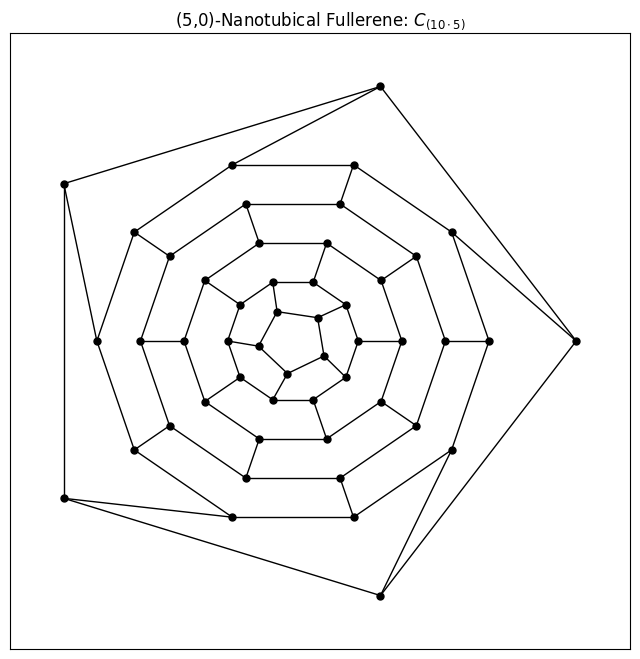

In [76]:
# Ustvari (5,0)-Nanotubical Fullerene graf za k=100 z zigzag povezavami
G = ntf(k=5, zigzag=True)

# Vizualiziraj graf
G.plot_graph(node_size=25, font_size=0, node_color="black", edge_color="black")

# Pretvori graf v različne formate
edge_list = G.convert_graph(format="edge_list")
adjacency_list = G.convert_graph(format="adjacency_list")
adjacency_matrix = G.convert_graph(format="adjacency_matrix")


Izrek 5

In [162]:
# (a) Ekscentrični povezovalni indeks ξc(G)
def check_xi_c(k):
    nanotube = ntf(k)
    ξc_actual = nanotube.compute_eccentric_connectivity()
    ξc_expected = 45 * (k**2) - 15 * k
    print(f"(a) ξc(G) = {ξc_actual}, Pričakovana vrednost: {ξc_expected}")
    print(f"(a) Je pravilno? {'Da' if ξc_actual == ξc_expected else 'Ne'}")

# (b) Ekscentrični sosednji indeks ξad(G)
def check_xi_ad(k):
    nanotube = ntf(k)
    ξad_actual = nanotube.compute_eccentric_adjacency_index()
    spodnja_meja = 90 * np.log(2)
    zgornja_meja = 90 * (np.log(2 * k - 1) - np.log(k - 1))
    print(f"(b) ξad(G) = {ξad_actual}, Interval: ({spodnja_meja}, {zgornja_meja})")
    print(f"(b) Je ξad v pričakovanem intervalu? {'Da' if spodnja_meja <= ξad_actual <= zgornja_meja else 'Ne'}")

# (c) Prvi ekscentrični povezovalni indeks ξ1(G)
def check_xi_1(k):
    nanotube = ntf(k)
    ξ1_actual = nanotube.compute_first_eccentric_connectivity_index()
    ξ1_expected1 = k * (2*k - 1) * (7*k -1) // 6
    ξ1_expected2 = 45 * (k**2) - 15 * k
    print(f"(c) ξ1(G) = {ξ1_actual}, Pričakovana vrednost: {ξ1_expected1}, ali {ξ1_expected2}")
    print(f"(c) Je pravilno? {'Da' if ξ1_actual == ξ1_expected1 else 'Ne'}")
    
# (d) Drugi ekscentrični povezovalni indeks ξ2(G)
def check_xi_2(k):
    nanotube = ntf(k)
    ξ2_actual = nanotube.compute_second_eccentric_connectivity_index()
    if k % 2 == 0:
        ξ2_expected = 35 * (k**3) - (45 / 2) * (k**2) + (- 5 * k + 10)
    else:
        ξ2_expected = 35 * (k**3) - (45 / 2) * (k**2) + (15 / 2 - 5 * k)
    print(f"(d) ξ2(G) = {ξ2_actual}, Pričakovana vrednost: {ξ2_expected}")
    print(f"(d) Je pravilno? {'Da' if ξ2_actual == ξ2_expected else 'Ne'}")


Testiranje točke a

In [78]:
for k in range(2, 80):
    check_xi_c(k)
    print(f"k = {k}")

(a) ξc(G) = 300, Pričakovana vrednost: 150
(a) Je pravilno? Ne
k = 2
(a) ξc(G) = 540, Pričakovana vrednost: 360
(a) Je pravilno? Ne
k = 3
(a) ξc(G) = 840, Pričakovana vrednost: 660
(a) Je pravilno? Ne
k = 4
(a) ξc(G) = 1170, Pričakovana vrednost: 1050
(a) Je pravilno? Ne
k = 5
(a) ξc(G) = 1590, Pričakovana vrednost: 1530
(a) Je pravilno? Ne
k = 6
(a) ξc(G) = 2130, Pričakovana vrednost: 2100
(a) Je pravilno? Ne
k = 7
(a) ξc(G) = 2760, Pričakovana vrednost: 2760
(a) Je pravilno? Da
k = 8
(a) ξc(G) = 3510, Pričakovana vrednost: 3510
(a) Je pravilno? Da
k = 9
(a) ξc(G) = 4350, Pričakovana vrednost: 4350
(a) Je pravilno? Da
k = 10
(a) ξc(G) = 5280, Pričakovana vrednost: 5280
(a) Je pravilno? Da
k = 11
(a) ξc(G) = 6300, Pričakovana vrednost: 6300
(a) Je pravilno? Da
k = 12
(a) ξc(G) = 7410, Pričakovana vrednost: 7410
(a) Je pravilno? Da
k = 13
(a) ξc(G) = 8610, Pričakovana vrednost: 8610
(a) Je pravilno? Da
k = 14
(a) ξc(G) = 9900, Pričakovana vrednost: 9900
(a) Je pravilno? Da
k = 15
(a) ξc

Testiranje točke b

In [79]:
for k in range(2, 60):
    check_xi_ad(k)
    print(f"k = {k}")

(b) ξad(G) = 36.0, Interval: (62.383246250395075, 98.87510598012987)
(b) Je ξad v pričakovanem intervalu? Ne
k = 2
(b) ξad(G) = 45.0, Interval: (62.383246250395075, 82.46616586867395)
(b) Je ξad v pričakovanem intervalu? Ne
k = 3
(b) ξad(G) = 51.96428571428571, Interval: (62.383246250395075, 76.25680743484831)
(b) Je ξad v pričakovanem intervalu? Ne
k = 4
(b) ξad(G) = 58.214285714285694, Interval: (62.383246250395075, 72.98371945946961)
(b) Je ξad v pričakovanem intervalu? Ne
k = 5
(b) ξad(G) = 62.538961038961034, Interval: (62.383246250395075, 70.96116243278433)
(b) Je ξad v pričakovanem intervalu? Da
k = 6
(b) ξad(G) = 64.1048951048951, Interval: (62.383246250395075, 69.58708994101336)
(b) Je ξad v pričakovanem intervalu? Da
k = 7
(b) ξad(G) = 65.28346653346654, Interval: (62.383246250395075, 68.59260468422072)
(b) Je ξad v pričakovanem intervalu? Da
k = 8
(b) ξad(G) = 64.95258418052538, Interval: (62.383246250395075, 67.83946221387424)
(b) Je ξad v pričakovanem intervalu? Da
k = 9
(

Testiranje točke c

In [165]:
for k in range(2, 100):
    check_xi_1(k)
    print(f"k = {k}")


(c) ξ1(G) = 25, Pričakovana vrednost: 13, ali 150
(c) Je pravilno? Ne
k = 2
(c) ξ1(G) = 36, Pričakovana vrednost: 50, ali 360
(c) Je pravilno? Ne
k = 3
(c) ξ1(G) = 64, Pričakovana vrednost: 126, ali 660
(c) Je pravilno? Ne
k = 4
(c) ξ1(G) = 81, Pričakovana vrednost: 255, ali 1050
(c) Je pravilno? Ne
k = 5
(c) ξ1(G) = 121, Pričakovana vrednost: 451, ali 1530
(c) Je pravilno? Ne
k = 6
(c) ξ1(G) = 169, Pričakovana vrednost: 728, ali 2100
(c) Je pravilno? Ne
k = 7
(c) ξ1(G) = 225, Pričakovana vrednost: 1100, ali 2760
(c) Je pravilno? Ne
k = 8
(c) ξ1(G) = 289, Pričakovana vrednost: 1581, ali 3510
(c) Je pravilno? Ne
k = 9
(c) ξ1(G) = 361, Pričakovana vrednost: 2185, ali 4350
(c) Je pravilno? Ne
k = 10
(c) ξ1(G) = 441, Pričakovana vrednost: 2926, ali 5280
(c) Je pravilno? Ne
k = 11
(c) ξ1(G) = 529, Pričakovana vrednost: 3818, ali 6300
(c) Je pravilno? Ne
k = 12
(c) ξ1(G) = 625, Pričakovana vrednost: 4875, ali 7410
(c) Je pravilno? Ne
k = 13
(c) ξ1(G) = 729, Pričakovana vrednost: 6111, ali 86

Vidimo, da ne drži. Poskusimo to popraviti.

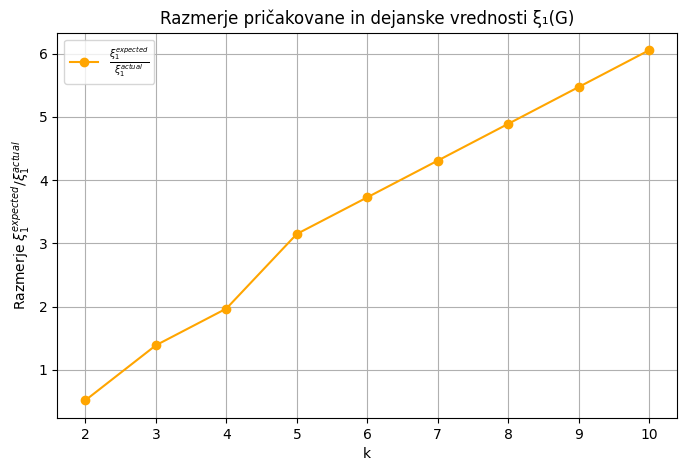

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Definiramo interval vrednosti k
k_values = np.arange(2, 11)  # 2 do 10 (vključno)

# Pričakovane vrednosti ξ₁(G) iz izreka
xi1_expected = np.array([
    (k * (2*k - 1) * (7*k - 1)) // 6 for k in k_values
])

# Dejanske vrednosti ξ₁(G) (te je treba nadomestiti z resničnimi)
xi1_actual = np.array([
    25, 36, 64, 81, 121, 169, 225, 289, 361  # Pravilna dolžina 9 vrednosti
])

# Izračunamo razmerje med pričakovano in dejansko vrednostjo
ratios = xi1_expected / xi1_actual

# Narišemo graf
plt.figure(figsize=(8, 5))
plt.plot(k_values, ratios, marker='o', linestyle='-', color='orange', label=r'$\frac{\xi_1^{expected}}{\xi_1^{actual}}$')

# Oznake in naslov
plt.xlabel("k")
plt.ylabel(r"Razmerje $\xi_1^{expected} / \xi_1^{actual}$")
plt.title("Razmerje pričakovane in dejanske vrednosti ξ₁(G)")
plt.legend()
plt.grid(True)

# Prikažemo graf
plt.show()

Izgleda, da je razmerje linearno za k>=6. Morda bi lahko popravili formulo.

In [ ]:
from scipy.optimize import curve_fit

# Podatki (kar ročno poskusimo)
k_values = np.array([
    2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
    26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48
])
xi1_actual = np.array([
    25, 36, 64, 81, 121, 169, 225, 289, 361, 441, 529, 625, 729, 841, 961, 1089, 1225, 1369, 1521,
    1681, 1849, 2025, 2209, 2401, 2601, 2809, 3025, 3249, 3481, 3721, 3969, 4225, 4489, 4761, 5041,
    5329, 5625, 5929, 6241, 6561, 6889, 7225, 7569, 7921, 8281, 8649, 9025
])

# Definiramo model: ξ₁(C₁₀ₖ) = (1/6) * k * (2k - 1) * (α * k + β)
def model(k, alpha, beta):
    return (1/6) * k * (2*k - 1) * (alpha * k + beta)

# Prilagodimo model, da najdemo α in β
params, _ = curve_fit(model, k_values, xi1_actual)
alpha_opt, beta_opt = params

print(f"Optimalna vrednost α: {alpha_opt:.15f}")
print(f"Optimalna vrednost β: {beta_opt:.15f}")

Optimalna vrednost α: 0.002927108794031
Optimalna vrednost β: -0.012893403238627


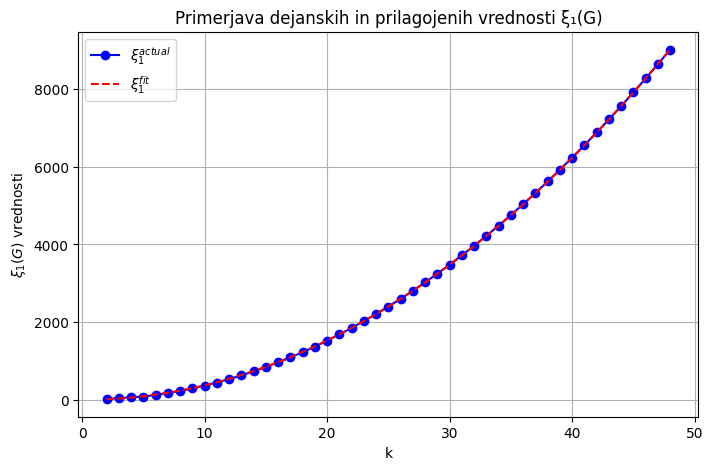

In [ ]:
# Graf primerjave dejanskih in prilagojenih vrednosti ξ₁(G)
plt.figure(figsize=(8, 5))
plt.plot(k_values, xi1_actual, marker='o', linestyle='-', label=r'$\xi_1^{actual}$', color='blue')
plt.plot(k_values, model(k_values, alpha_opt, beta_opt), linestyle='--', color='red', label=r'$\xi_1^{fit}$')

plt.xlabel("k")
plt.ylabel(r"$\xi_1(G)$ vrednosti")
plt.title("Primerjava dejanskih in prilagojenih vrednosti ξ₁(G)")
plt.grid(True)
plt.legend()
plt.show()

In [188]:
def corrected_xi1(k):
    alpha = 0.005307877152734  # Optimalna vrednost α
    beta = 11.630913886307701  # Optimalna vrednost β
    return (1/6) * k * (2*k - 1) * (alpha * k + beta)

# Preverimo popravljeno formulo za nekaj vrednosti k
for k in range(6,50):
    print(f"k = {k}, Popravljena ξ₁(C₁₀ₖ) = {corrected_xi1(k):.5f}")

k = 6, Popravljena ξ₁(C₁₀ₖ) = 128.29037
k = 7, Popravljena ξ₁(C₁₀ₖ) = 176.96571
k = 8, Popravljena ξ₁(C₁₀ₖ) = 233.46754
k = 9, Popravljena ξ₁(C₁₀ₖ) = 297.80646
k = 10, Popravljena ξ₁(C₁₀ₖ) = 369.99310
k = 11, Popravljena ξ₁(C₁₀ₖ) = 450.03807
k = 12, Popravljena ξ₁(C₁₀ₖ) = 537.95199
k = 13, Popravljena ξ₁(C₁₀ₖ) = 633.74547
k = 14, Popravljena ξ₁(C₁₀ₖ) = 737.42912
k = 15, Popravljena ξ₁(C₁₀ₖ) = 849.01357
k = 16, Popravljena ξ₁(C₁₀ₖ) = 968.50943
k = 17, Popravljena ξ₁(C₁₀ₖ) = 1095.92732
k = 18, Popravljena ξ₁(C₁₀ₖ) = 1231.27785
k = 19, Popravljena ξ₁(C₁₀ₖ) = 1374.57163
k = 20, Popravljena ξ₁(C₁₀ₖ) = 1525.81929
k = 21, Popravljena ξ₁(C₁₀ₖ) = 1685.03143
k = 22, Popravljena ξ₁(C₁₀ₖ) = 1852.21868
k = 23, Popravljena ξ₁(C₁₀ₖ) = 2027.39165
k = 24, Popravljena ξ₁(C₁₀ₖ) = 2210.56095
k = 25, Popravljena ξ₁(C₁₀ₖ) = 2401.73721
k = 26, Popravljena ξ₁(C₁₀ₖ) = 2600.93103
k = 27, Popravljena ξ₁(C₁₀ₖ) = 2808.15304
k = 28, Popravljena ξ₁(C₁₀ₖ) = 3023.41384
k = 29, Popravljena ξ₁(C₁₀ₖ) = 3246.72406
k = 30,

Ni pravilno.

Testiranje točke d

In [81]:
for k in range(2, 50):
    check_xi_2(k)
    print(f"k = {k}")

(d) ξ2(G) = 750.0, Pričakovana vrednost: 190.0
(d) Je pravilno? Ne
k = 2
(d) ξ2(G) = 1620.0, Pričakovana vrednost: 735.0
(d) Je pravilno? Ne
k = 3
(d) ξ2(G) = 2960.0, Pričakovana vrednost: 1870.0
(d) Je pravilno? Ne
k = 4
(d) ξ2(G) = 4595.0, Pričakovana vrednost: 3795.0
(d) Je pravilno? Ne
k = 5
(d) ξ2(G) = 7160.0, Pričakovana vrednost: 6730.0
(d) Je pravilno? Ne
k = 6
(d) ξ2(G) = 11110.0, Pričakovana vrednost: 10875.0
(d) Je pravilno? Ne
k = 7
(d) ξ2(G) = 16450.0, Pričakovana vrednost: 16450.0
(d) Je pravilno? Da
k = 8
(d) ξ2(G) = 23655.0, Pričakovana vrednost: 23655.0
(d) Je pravilno? Da
k = 9
(d) ξ2(G) = 32710.0, Pričakovana vrednost: 32710.0
(d) Je pravilno? Da
k = 10
(d) ξ2(G) = 43815.0, Pričakovana vrednost: 43815.0
(d) Je pravilno? Da
k = 11
(d) ξ2(G) = 57190.0, Pričakovana vrednost: 57190.0
(d) Je pravilno? Da
k = 12
(d) ξ2(G) = 73035.0, Pričakovana vrednost: 73035.0
(d) Je pravilno? Da
k = 13
(d) ξ2(G) = 91570.0, Pričakovana vrednost: 91570.0
(d) Je pravilno? Da
k = 14
(d) ξ2(

Ugotovitve:\
Točka a velja za k <= 8 \
Točka b velja za k <= 6 \
Točka c ne velja za noben k \
Točka d velja za k <= 8 

Izrek 6

In [85]:
# Funkcija, ki izračuna Wt(C{10k})
def calculate_wiener_polarity_index(G, t):
    # Vse razdalje med vozlišči
    distances = dict(nx.all_pairs_shortest_path_length(G))
    count = 0

    # Štejemo pare vozlišč na razdalji t
    for u in G.nodes:
        for v in G.nodes:
            if u < v and distances[u][v] == t:
                count += 1

    return count

# Preverjanje trditev iz izreka
def verify_theorem(k, t):
    molecule = ntf(k)
    G = molecule.G

    calculated_Wt = calculate_wiener_polarity_index(G, t)

    # Pričakovana vrednost iz trditve
    if t == 1:
        expected = 15 * k
    elif t == 2:
        expected = 30 * k
    elif t == 3:
        expected = 45 * k - 30
    elif t == 4:
        expected = 60 * k - 80
    elif t == 5:
        expected = 70 * k - 135
    elif t == 6:
        expected = 70 * k - 180
    elif t == 7:
        expected = 65 * k - 220
    elif t == 8:
        expected = 60 * k - 230
    elif t == 9:
        expected = 55 * k - 250
    elif 10 <= t <= 2 * k - 1:
        expected = 50 * k - 25 * t
    else:
        expected = 0

    print(f"Za k={k} in t={t}:")
    print(f"Izračunan Wt: {calculated_Wt}, Pričakovan Wt: {expected}")
    print(f"Trditev drži? {calculated_Wt == expected}\n")

k_values = [1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14]  
t_values = [1,2,3,4,5,6,7,8,9, 10, 15, 20, 25, 30, 36, 49] 
for k in k_values:
    for t in t_values:
        verify_theorem(k, t)

Za k=1 in t=1:
Izračunan Wt: 15, Pričakovan Wt: 15
Trditev drži? True

Za k=1 in t=2:
Izračunan Wt: 26, Pričakovan Wt: 30
Trditev drži? False

Za k=1 in t=3:
Izračunan Wt: 15, Pričakovan Wt: 15
Trditev drži? True

Za k=1 in t=4:
Izračunan Wt: 8, Pričakovan Wt: -20
Trditev drži? False

Za k=1 in t=5:
Izračunan Wt: 2, Pričakovan Wt: -65
Trditev drži? False

Za k=1 in t=6:
Izračunan Wt: 0, Pričakovan Wt: -110
Trditev drži? False

Za k=1 in t=7:
Izračunan Wt: 0, Pričakovan Wt: -155
Trditev drži? False

Za k=1 in t=8:
Izračunan Wt: 0, Pričakovan Wt: -170
Trditev drži? False

Za k=1 in t=9:
Izračunan Wt: 0, Pričakovan Wt: -195
Trditev drži? False

Za k=1 in t=10:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True

Za k=1 in t=15:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True

Za k=1 in t=20:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True

Za k=1 in t=25:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True

Za k=1 in t=30:
Izračunan Wt: 0, Pričakovan Wt: 0
Trditev drži? True



Preverimo, če velja koda za manjše k, pri vseh možnih t.

In [86]:
def preveri_vse_t_za_k(k):
    molecule = ntf(k)
    G = molecule.G
    diameter = 2 * k - 1

    vse_velja = True  # privzamemo, da velja za vse t

    for t in range(1, diameter + 1):
        calculated_Wt = calculate_wiener_polarity_index(G, t)

        # Pričakovana vrednost iz izreka
        if t == 1:
            expected = 15 * k
        elif t == 2:
            expected = 30 * k
        elif t == 3:
            expected = 45 * k - 30
        elif t == 4:
            expected = 60 * k - 80
        elif t == 5:
            expected = 70 * k - 135
        elif t == 6:
            expected = 70 * k - 180
        elif t == 7:
            expected = 65 * k - 220
        elif t == 8:
            expected = 60 * k - 230
        elif t == 9:
            expected = 55 * k - 250
        elif 10 <= t <= diameter:
            expected = 50 * k - 25 * t
        else:
            expected = 0

        if calculated_Wt != expected:
            print(f"Ne drži za k={k}, t={t}: Izračunano={calculated_Wt}, Pričakovano={expected}")
            vse_velja = False
        else:
            print(f"Drži za k={k}, t={t}")

    if vse_velja:
        print(f"Trditev popolnoma drži za k={k}.")
    else:
        print(f"Trditev ne drži za vse vrednosti t pri k={k}.")

preveri_vse_t_za_k(9)


Drži za k=9, t=1
Drži za k=9, t=2
Drži za k=9, t=3
Drži za k=9, t=4
Drži za k=9, t=5
Drži za k=9, t=6
Drži za k=9, t=7
Drži za k=9, t=8
Drži za k=9, t=9
Drži za k=9, t=10
Drži za k=9, t=11
Drži za k=9, t=12
Drži za k=9, t=13
Drži za k=9, t=14
Drži za k=9, t=15
Drži za k=9, t=16
Drži za k=9, t=17
Trditev popolnoma drži za k=9.


Ugotovitve:
- t je vedno navzgor omejen z 2k - 1, saj je to premer grafa - torej je logično, da je Wt = 0 za t >= 2k - 1
- trditev je pravilna za vse k>=2, če le upoštevamo, da je t omejen s premerom grafa

Izrek 7

In [87]:
results = []

k_values = range(10, 100)  

for k in k_values:
    molecule = ntf(k)
    G = molecule.G  

    
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))  # Najkrajše razdalje med vozlišči
    node_pairs = [(u, v) for u in G.nodes for v in G.nodes if u < v]  # Vsi pari vozlišč brez ponavljanja

    # (a) Wienerjev indeks 
    W_actual = sum(shortest_paths[u][v] for u, v in node_pairs)

    # (b) Hiper-Wienerjev indeks 
    WW_actual = sum(shortest_paths[u][v] + shortest_paths[u][v]**2 for u, v in node_pairs)

    # (c) Recipročni komplementarni Wienerjev indeks 
    diameter = nx.diameter(G)
    RCW_actual = sum(1 / (diameter + 1 - shortest_paths[u][v]) for u, v in node_pairs)

    # teoretične vrednosti
    W_theory = (100/3) * k**3 + (1175/3) * k - 670
    WW_theory = (100/3) * k**4 + (100/3) * k**3 - (25/3) * k**2 + (10175/3) * k - 7200

    # Izračun R_k za RCW_theory
    R_k = (15 * k) / (2 * k - 1) + (30 * k) / (2 * k - 2) + (45 * k - 30) / (2 * k - 3) \
        + (60 * k - 80) / (2 * k - 4) + (70 * k - 135) / (2 * k - 5) \
        + (70 * k - 180) / (2 * k - 6) + (65 * k - 220 ) / (2 * k - 7) \
        + (60 * k - 230) / (2 * k - 8) + (55 * k - 250) / (2 * k - 9)
    RCW_theory = R_k + 50 * k - 250

    results.append([k, 
                    W_actual, W_theory, W_actual - W_theory,
                    WW_actual, WW_theory, WW_actual - WW_theory,
                    RCW_actual, RCW_theory, RCW_actual - RCW_theory])

df = pd.DataFrame(results, columns=[
    "k",
    "(a) W dejansko", "(a) W teoretično", "(a) Razlika",
    "(b) WW dejansko", "(b) WW teoretično", "(b) Razlika",
    "(c) RCW dejansko", "(c) RCW teoretično", "(c) Razlika"
])

print(df)

     k  (a) W dejansko  (a) W teoretično   (a) Razlika  (b) WW dejansko  \
0   10           36580           36580.0  0.000000e+00           392550   
1   11           48005           48005.0 -7.275958e-12           561500   
2   12           61630           61630.0 -7.275958e-12           781100   
3   13           77655           77655.0 -1.455192e-11          1060750   
4   14           96280           96280.0  0.000000e+00          1410650   
..  ..             ...               ...           ...              ...   
85  95        28615705        28615705.0  0.000000e+00       2743839800   
86  96        29528130        29528130.0 -3.725290e-09       2860888000   
87  97        30459755        30459755.0 -3.725290e-09       2981641850   
88  98        31410780        31410780.0  0.000000e+00       3106178750   
89  99        32381405        32381405.0 -3.725290e-09       3234576900   

    (b) WW teoretično   (b) Razlika  (c) RCW dejansko  (c) RCW teoretično  \
0        3.925500e+05 

Napaka v formuli za Rk.

Izrek 8

In [ ]:
def compute_L(k, alpha):
    """Izračuna spodnjo mejo L iz izreka."""
     

    if alpha < 0 and alpha not in [-1, -2]:  
        L = (50 * k / (alpha + 1)) * ((2*k)**(alpha + 1) - (10)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k-1)**(alpha + 2) - (9)**(alpha + 2))

    elif 0 < alpha < 1:  
        L = (50 * k / (alpha + 1)) * ((2*k-1)**(alpha + 1) - (9)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k-1)**(alpha + 2) - (9)**(alpha + 2))

    elif alpha > 1:  
        L = (50 * k / (alpha + 1)) * ((2*k-1)**(alpha + 1) - (9)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k)**(alpha + 2) - (10)**(alpha + 2))

    elif alpha == -1:  
        L = 50 * k * (np.log(2*k) - np.log(10)) 

    elif alpha == -2:  
        L = -50 * k * ((2*k)**-1 - (10)**-1) - 25 * (np.log(2*k-1) - np.log(9))

    else:
        raise ValueError("Neveljavna vrednost alpha.")

    return L

def compute_P(k, alpha):
    """Izračuna zgornjo mejo P iz izreka."""
    

    if alpha < 0 and alpha not in [-1, -2]:  
        P = (50 * k / (alpha + 1)) * ((2*k-1)**(alpha + 1) - (9)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k)**(alpha + 2) - (10)**(alpha + 2))

    elif 0 < alpha < 1:  
        P = (50 * k / (alpha + 1)) * ((2*k)**(alpha + 1) - (10)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k)**(alpha + 2) - (10)**(alpha + 2))

    elif alpha > 1:  
        P = (50 * k / (alpha + 1)) * ((2*k)**(alpha + 1) - (10)**(alpha + 1)) - \
            (25 / (alpha + 2)) * ((2*k-1)**(alpha + 2) - (9)**(alpha + 2))

    elif alpha == -1:  
        P = 50 * k * (np.log(2*k-1) - np.log(9)) - 50 * k + 250

    elif alpha == -2:  
        P = -50 * k * ((2*k-1)**-1 - (9)**-1) - 25 * (np.log(2*k) - np.log(10))

    else:
        raise ValueError("Neveljavna vrednost alpha.")

    return P

def compute_W9_alpha(k, alpha):
    """        """
    specific_values = {
        1:  15 * k,
        2:  30 * k,
        3:  45 * k - 30,
        4:  60 * k - 80,
        5:  70 * k - 135,
        6:  70 * k - 180,
        7:  65 * k - 220,
        8:  60 * k - 230,
        9:  55 * k - 250
    }

    return sum(t * specific_values[t] for t in range(1, 10))

def compute_actual_W_alpha(k, alpha):
    """Izračuna dejanski W^alpha(C_10k)."""
    return 50 * k * sum(i**alpha for i in range(10, 2*k)) - 25 * sum(i**(alpha+1) for i in range(10, 2*k))





def verify_inequality(k, alpha):
    """Preveri, ali dejanska vrednost |W^alpha(C_10k)| leži v intervalu [min(L,P) + W_9, max(L,P) + W_9]."""
    actual_W_alpha = abs(compute_actual_W_alpha(k, alpha))  # Dodamo absolutno vrednost, ker je včasih P < L
    L = compute_L(k, alpha)
    P = compute_P(k, alpha)
    W_9_alpha = compute_W9_alpha(k, alpha)

    if L is None or P is None:
        return None  # Izrek ne velja za alpha = 0, 1

    # lower_bound = min(L, P) + W_9_alpha
    # upper_bound = max(L, P) + W_9_alpha

    lower_bound = min(L, P) 
    upper_bound = max(L, P) 

    return lower_bound <= actual_W_alpha <= upper_bound



k_values = range(20,30)  
alpha_values = [-2, -1, 0.5, 3, 5] 

results = []
for k in k_values:
    for alpha in alpha_values:
        L = compute_L(k, alpha)
        P = compute_P(k, alpha)
        actual_W_alpha = compute_actual_W_alpha(k, alpha)
        W_9_alpha = compute_W9_alpha(k, alpha)
        result = verify_inequality(k, alpha)
        results.append((k, alpha, L, P, actual_W_alpha, W_9_alpha, result))

df = pd.DataFrame(results, columns=['k', 'alpha', 'L', 'P', 'W_alpha', 'W_9_alpha', 'Vrednost v omejitvah'])
print(df)

     k  alpha             L             P       W_alpha  W_9_alpha  \
0   20   -2.0  3.834157e+01  5.081273e+01  4.423686e+01      45205   
1   20   -1.0  1.386294e+03  7.163371e+02  6.745748e+02      45205   
2   20    0.5  5.181353e+04  4.954235e+04  5.071174e+04      45205   
3   20    3.0  6.522000e+07  1.866742e+08  1.262250e+08      45205   
4   20    5.0  1.261577e+09  1.924063e+11  9.721424e+10      45205   
5   21   -2.0  4.209131e+01  5.517980e+01  4.827555e+01      47855   
6   21   -1.0  1.506839e+03  7.921649e+02  7.476633e+02      47855   
7   21    0.5  5.966315e+04  5.723984e+04  5.848730e+04      47855   
8   21    3.0  8.708384e+07  2.352094e+08  1.614668e+08      47855   
9   21    5.0  7.856193e+09  2.648717e+11  1.368513e+11      47855   
10  22   -2.0  4.590061e+01  5.960071e+01  5.237097e+01      50505   
11  22   -1.0  1.629765e+03  8.703731e+02  8.231334e+02      50505   
12  22    0.5  6.816086e+04  6.558538e+04  6.691092e+04      50505   
13  22    3.0  1.142

In [134]:
k_test = 50
alpha_test = -2

L_test = compute_L(k_test, alpha_test)
P_test = compute_P(k_test, alpha_test)
W_alpha_test = compute_actual_W_alpha(k_test, alpha_test)
W_9_alpha_test = compute_W9_alpha(k_test, alpha_test)
is_within_bounds = verify_inequality(k_test, alpha_test)

print(f"L = {L_test}")
print(f"P = {P_test}")
print(f"W_alpha = {W_alpha_test}")
print(f"W_9_alpha = {W_9_alpha_test}")
print(f"Je v omejitvah? {is_within_bounds}")

L = 165.05261818004078
P = 194.96062520040135
W_alpha = 179.08019095409625
W_9_alpha = 124705
Je v omejitvah? True


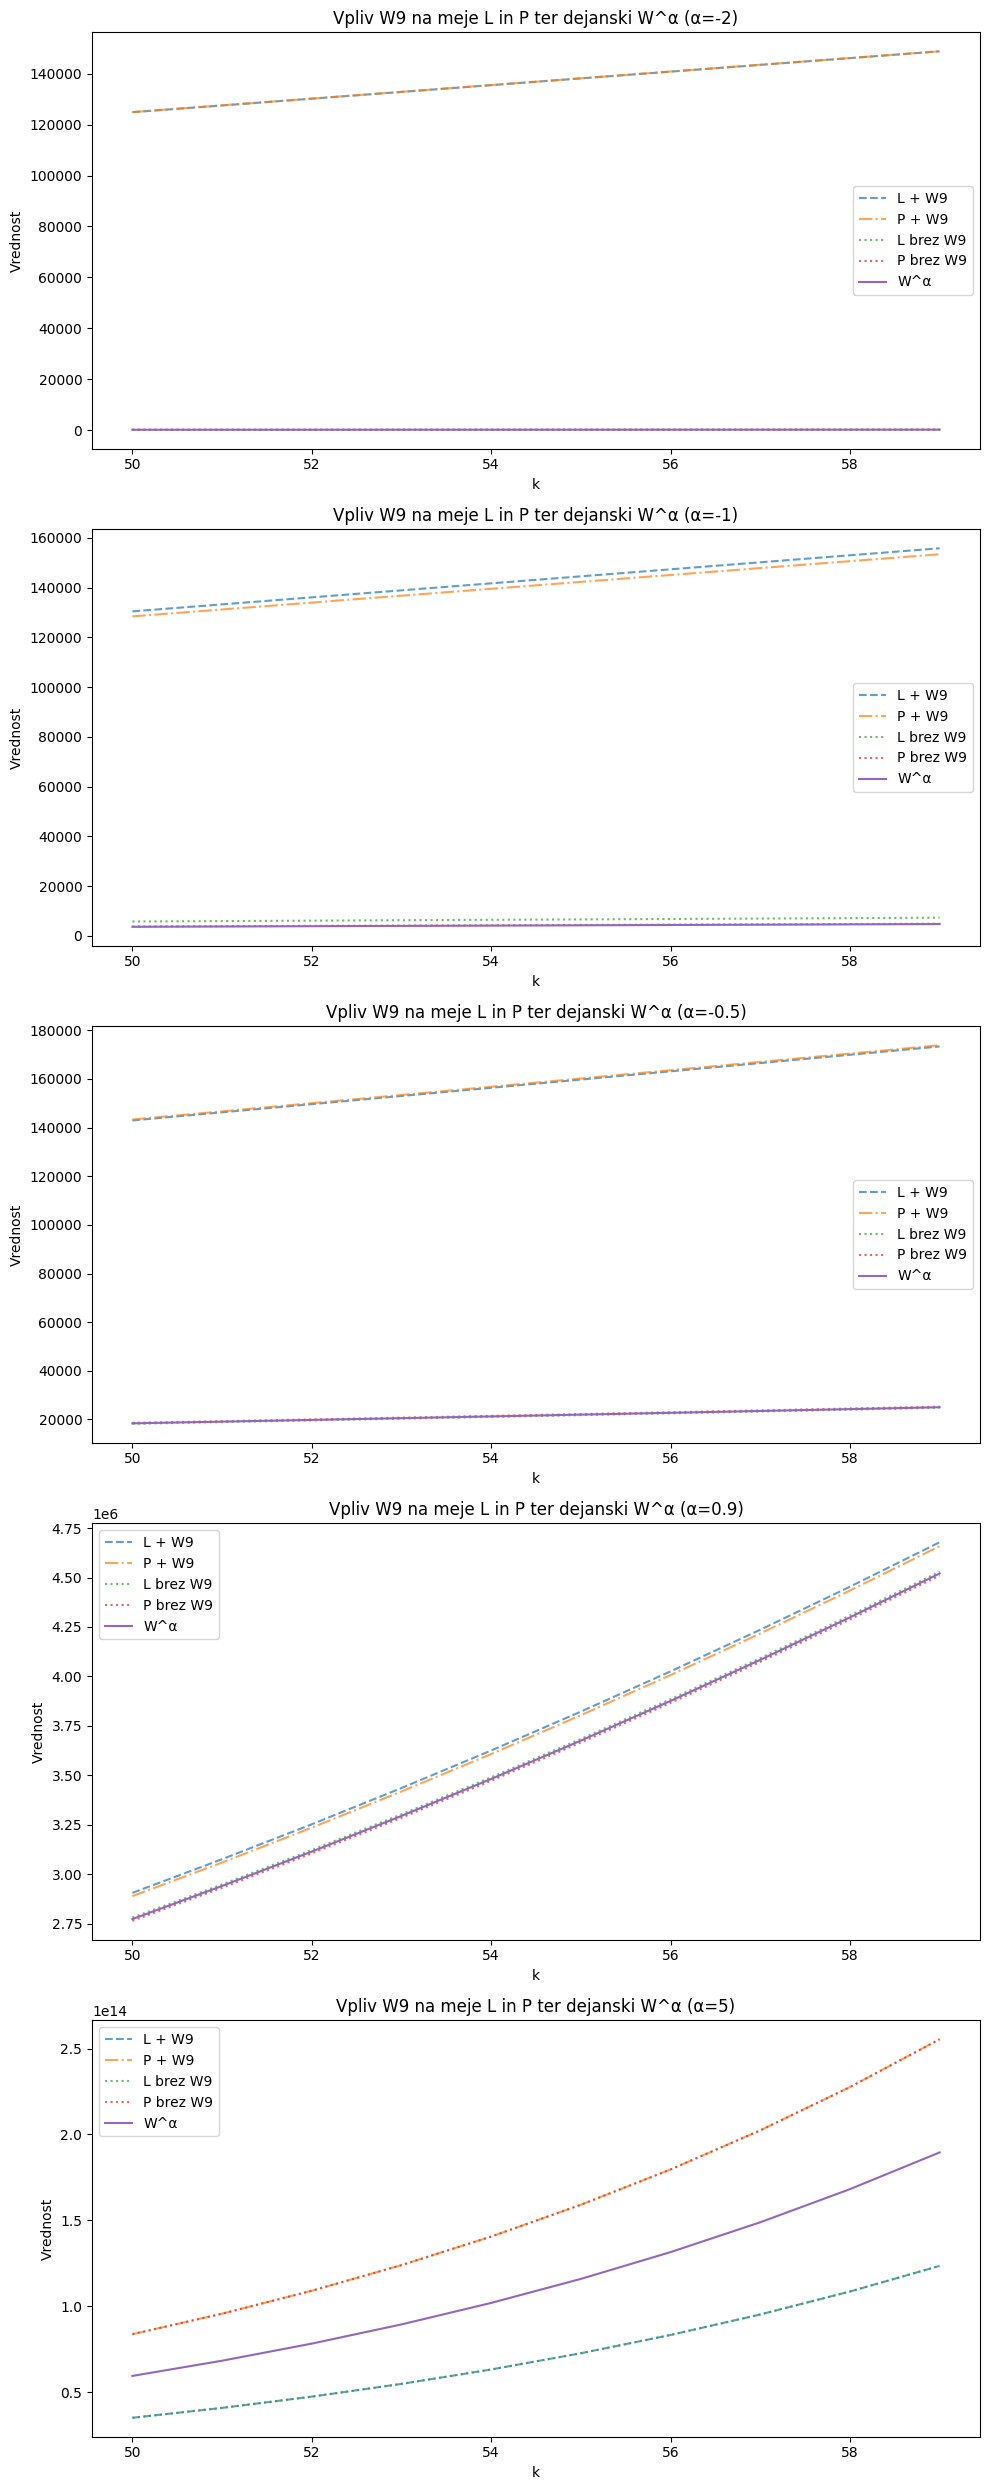

In [ ]:
k_values = range(50, 60)  
alpha_values = [-2, -1, - 0.5, 0.9, 5]  

num_alphas = len(alpha_values)
fig, axes = plt.subplots(nrows=num_alphas, figsize=(10, 5 * num_alphas))

if num_alphas == 1:
    axes = [axes] 

for idx, alpha in enumerate(alpha_values):
    L_values = []
    P_values = []
    W_actual_values = []
    W9_values = []
    L_no_W9 = []
    P_no_W9 = []

    for k in k_values:
        L = compute_L(k, alpha)
        P = compute_P(k, alpha)
        W_actual = compute_actual_W_alpha(k, alpha)
        W9 = compute_W9_alpha(k, alpha)

        if L is not None and P is not None:
            L_values.append(L + W9)  # L z dodanim W9
            P_values.append(P + W9)  # P z dodanim W9
            L_no_W9.append(L)        # L brez W9
            P_no_W9.append(P)        # P brez W9
            W_actual_values.append(W_actual)
            W9_values.append(W9)

    ax = axes[idx]
    ax.plot(list(k_values), L_values, '--', label=f'L + W9', alpha=0.7)
    ax.plot(list(k_values), P_values, '-.', label=f'P + W9', alpha=0.7)
    ax.plot(list(k_values), L_no_W9, linestyle='dotted', label=f'L brez W9', alpha=0.7)
    ax.plot(list(k_values), P_no_W9, linestyle='dotted', label=f'P brez W9', alpha=0.7)
    ax.plot(list(k_values), W_actual_values, label=f'W^α')

    ax.set_xlabel('k')
    ax.set_ylabel('Vrednost')
    ax.set_title(f'Vpliv W9 na meje L in P ter dejanski W^α (α={alpha})')
    ax.legend()

plt.tight_layout()
plt.show()


In [146]:
k_values = range(20, 30)  # Manjši interval za jasen prikaz
alpha_values = [-2, -1, 0.5, 3, 5]  # Problematične in dobre vrednosti α

# Priprava podatkov za prikaz, kje izrek ne drži
incorrect_results = []

for k in k_values:
    for alpha in alpha_values:
        L = compute_L(k, alpha)
        P = compute_P(k, alpha)
        actual_W_alpha = compute_actual_W_alpha(k, alpha)
        W_9_alpha = compute_W9_alpha(k, alpha)

        if L is not None and P is not None:
            lower_bound = min(L, P) + W_9_alpha
            upper_bound = max(L, P) + W_9_alpha
           

            # Preverimo, če dejanska vrednost ni znotraj intervala
            if not (lower_bound <= actual_W_alpha <= upper_bound):
                incorrect_results.append((k, alpha,  lower_bound , actual_W_alpha, upper_bound  , W_9_alpha, L , P ))

incorrect_df = pd.DataFrame(incorrect_results, columns=['k', 'alpha', 'Spodnja meja', 'W_alpha', 'Zgornja meja' , 'W_9_alpha', 'L' , 'P'])
incorrect_df_sorted = incorrect_df.sort_values(by=['alpha', 'k'])

pd.set_option('display.max_rows', None)  # Prikaže vse vrstice
pd.set_option('display.max_columns', None)  # Prikaže vse stolpce
print(incorrect_df_sorted)

     k  alpha   Spodnja meja        W_alpha   Zgornja meja  W_9_alpha  \
0   20   -2.0   45243.341573      44.236862   45255.812726      45205   
3   21   -2.0   47897.091313      48.275546   47910.179797      47855   
6   22   -2.0   50550.900612      52.370967   50564.600713      50505   
9   23   -2.0   53204.764052      56.518081   53219.070815      53155   
12  24   -2.0   55858.676924      60.712488   55873.586020      55805   
15  25   -2.0   58512.635107      64.950326   58528.142737      58455   
18  26   -2.0   61166.634974      69.228188   61182.737783      61105   
21  27   -2.0   63820.673317      73.543052   63837.368328      63755   
24  28   -2.0   66474.747285      77.892228   66492.031845      66405   
27  29   -2.0   69128.854333      82.273307   69146.726067      69055   
1   20   -1.0   45921.337069     674.574785   46591.294361      45205   
4   21   -1.0   48647.164864     747.663280   49361.838752      47855   
7   22   -1.0   51375.373092     823.133403   52134

A.1

1. Reciprocal complementary

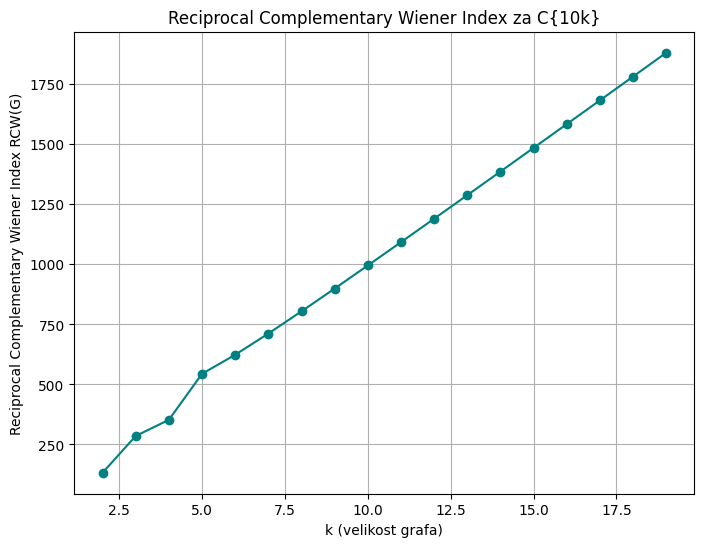

In [90]:
def reciprocal_complementary_wiener_index(G):
    diameter = nx.diameter(G)  # Premer grafa (največja razdalja med vozlišči)
    distances = dict(nx.all_pairs_shortest_path_length(G))  # Vse razdalje med pari vozlišč

    index = sum(
        1 / (diameter + 1 - distances[u][v])
        for u in G.nodes()
        for v in G.nodes()
        if u != v
    )
    return index

k_values = range(2, 20)
rcw_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    rcw_index = reciprocal_complementary_wiener_index(G)
    rcw_indices.append(rcw_index)


plt.figure(figsize=(8, 6))
plt.plot(k_values, rcw_indices, 'o-', color='teal')
plt.xlabel('k (velikost grafa)')
plt.ylabel('Reciprocal Complementary Wiener Index RCW(G)')
plt.title('Reciprocal Complementary Wiener Index za C{10k}')
plt.grid(True)
plt.show()

Rast je (z razliko pri majhnih k) linearna in stabilna. Razdalje so pri majhnih k bolj skoncentrirane in graf preide iz kompaktne strukture v bolj raztegnjeno strukturo. 

6. Sum-Balaban index

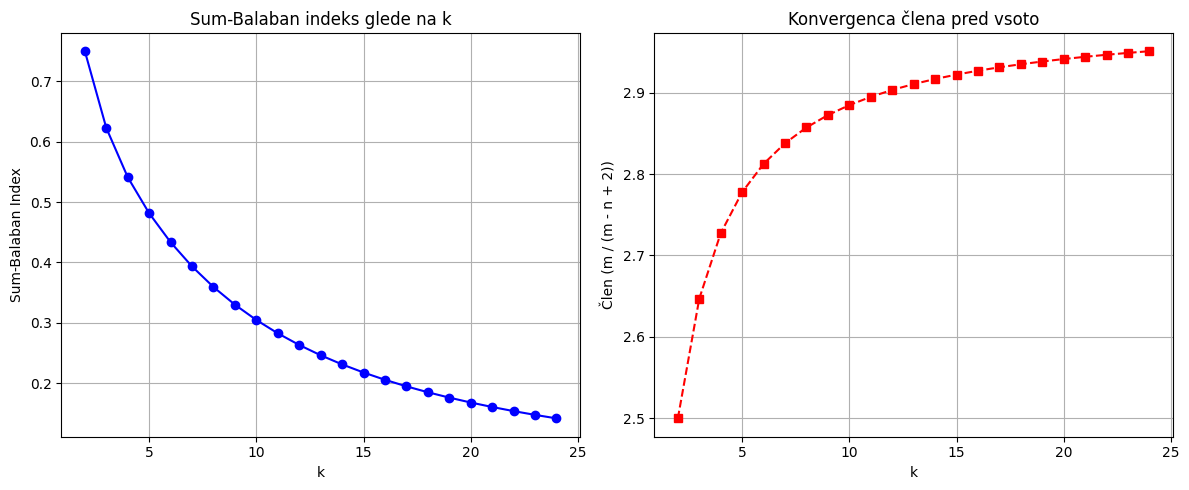

Člen pri k=24 je približno: 2.9508


In [91]:
# Najprej definirajmo funkcijo za Sum-Balaban indeks
def sum_balaban_index(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()

    # Izračunaj w(u) za vsako vozlišče
    distances = dict(nx.all_pairs_shortest_path_length(G))
    w = {u: sum(distances[u].values()) for u in G.nodes}

    # Glavni izraz indeksa
    sum_term = sum(1 / (w[u] + w[v]) for u, v in G.edges)
    sb_index = (m / (m - n + 2)) * sum_term

    return sb_index, m / (m - n + 2)

k_values = list(range(2, 25))  
sb_indices = []
prefactors = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G

    sb_index, prefactor = sum_balaban_index(G)
    sb_indices.append(sb_index)
    prefactors.append(prefactor)


plt.figure(figsize=(12, 5))

# Sum-Balaban indeks
plt.subplot(1, 2, 1)
plt.plot(k_values, sb_indices, marker='o', linestyle='-', color='blue')
plt.xlabel('k')
plt.ylabel('Sum-Balaban Index')
plt.title('Sum-Balaban indeks glede na k')
plt.grid(True)

# člen pred vsoto
plt.subplot(1, 2, 2)
plt.plot(k_values, prefactors, marker='s', linestyle='--', color='red')
plt.xlabel('k')
plt.ylabel('Člen (m / (m - n + 2))')
plt.title('Konvergenca člena pred vsoto')
plt.grid(True)

plt.tight_layout()
plt.show()

# Preverimo kam konvergira člen pred vsoto:
lim_prefactor = prefactors[-1]
print(f"Člen pri k={k_values[-1]} je približno: {lim_prefactor:.4f}")

Opazimo, da člen pred vsoto konvergira k 3 (stabilno razmerje povezav in vozlišč). Indeks nam pove, kako so vozlišča povezana znotraj grafa. Nižja vrednost implicira kompakten graf in enakomerno, simetrično strukturo.

7. Generalized Wiener index

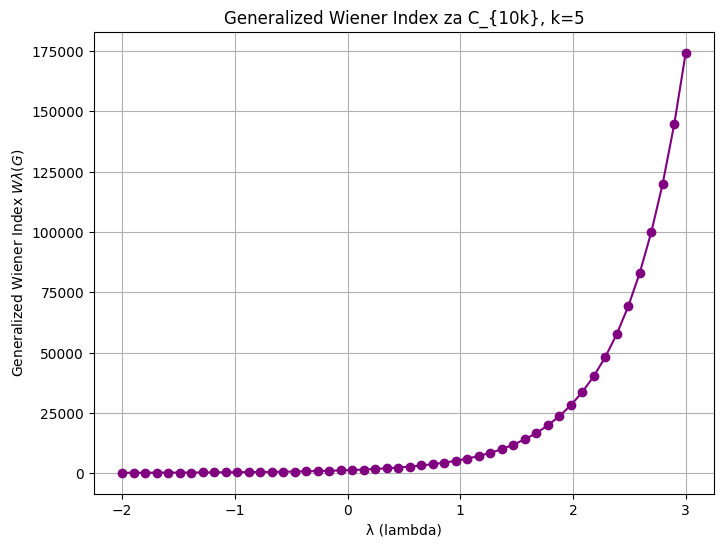

In [92]:
# Funkcija za izračun W_lambda(G)
def generalized_wiener_index(G, lambd):
    distances = dict(nx.all_pairs_shortest_path_length(G))
    wiener_sum = 0

    # seštevek čez vse neurejene pare (u,v)
    nodes = list(G.nodes())
    for i, u in enumerate(nodes):
        for v in nodes[i+1:]:  # vsak par samo enkrat
            d = distances[u][v]
            if d > 0:
                wiener_sum += d ** lambd

    return wiener_sum

k = 5
molecule = ntf(k)
G = molecule.G

lambdas = np.linspace(-2, 3, 50)
wiener_indices = []

for lambd in lambdas:
    wiener_index = generalized_wiener_index(G, lambd)
    wiener_indices.append(wiener_index)

plt.figure(figsize=(8, 6))
plt.plot(lambdas, wiener_indices, 'o-', color='purple')
plt.xlabel('λ (lambda)')
plt.ylabel('Generalized Wiener Index $W{λ}(G)$')
plt.title(f'Generalized Wiener Index za C_{{10k}}, k={k}')
plt.grid(True)
plt.show()

Pri lambda = -1, dobimo Hararyev indeks. 

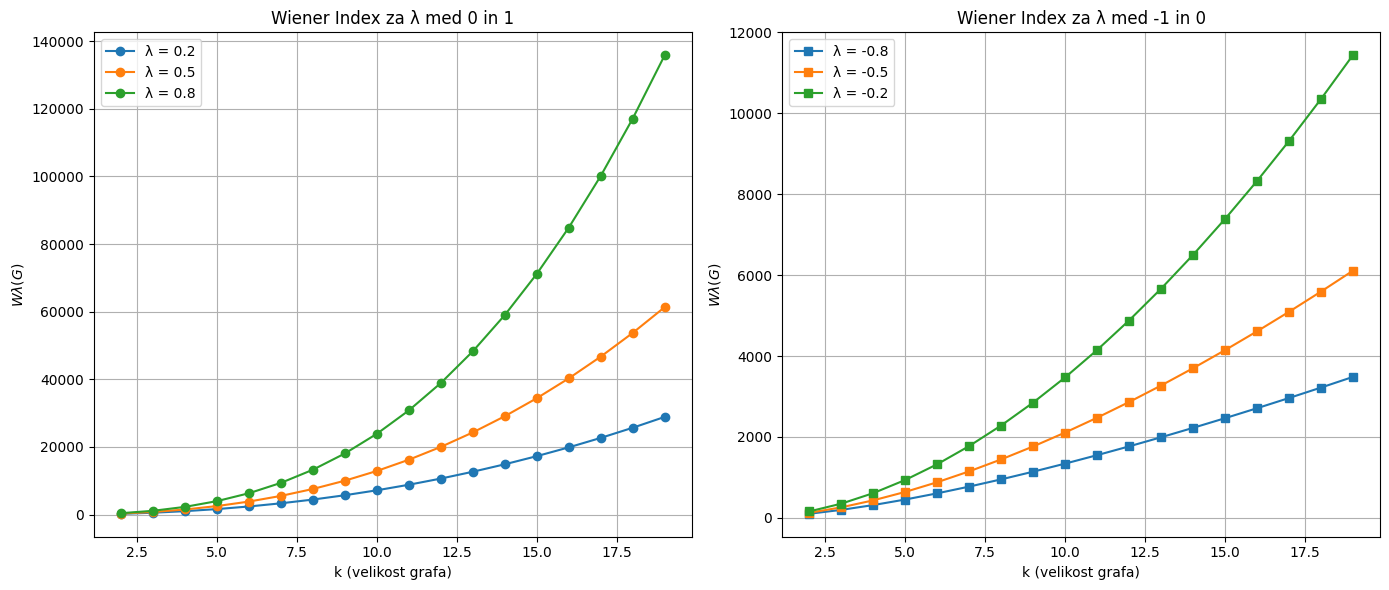

In [93]:
# Funkcija za izračun posplošenega Wiener indeksa
def generalized_wiener_index(G, lambd):
    distances = dict(nx.all_pairs_shortest_path_length(G))
    wiener_sum = 0

    nodes = list(G.nodes())
    for i, u in enumerate(nodes):
        for v in nodes[i+1:]:
            d = distances[u][v]
            if d > 0:
                wiener_sum += d ** lambd

    return wiener_sum

k_values = range(2, 20)
lambdas_positive = [0.2, 0.5, 0.8]
lambdas_negative = [-0.8, -0.5, -0.2]

plt.figure(figsize=(14, 6))

# Lambda med 0 in 1
plt.subplot(1, 2, 1)
for lambd in lambdas_positive:
    indices = []
    for k in k_values:
        molecule = ntf(k)
        G = molecule.G
        indices.append(generalized_wiener_index(G, lambd))
    plt.plot(k_values, indices, '-o', label=f'λ = {lambd}')

plt.title('Wiener Index za λ med 0 in 1')
plt.xlabel('k (velikost grafa)')
plt.ylabel('$Wλ(G)$')
plt.grid(True)
plt.legend()

# Lambda med -1 in 0
plt.subplot(1, 2, 2)
for lambd in lambdas_negative:
    indices = []
    for k in k_values:
        molecule = ntf(k)
        G = molecule.G
        indices.append(generalized_wiener_index(G, lambd))
    plt.plot(k_values, indices, '-s', label=f'λ = {lambd}')

plt.title('Wiener Index za λ med -1 in 0')
plt.xlabel('k (velikost grafa)')
plt.ylabel('$Wλ(G)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Opazimo da ne glede na lambdo indeks monotono raste, kar je smiselno, saj se število vozlišč povečuje. \
Pri lambdah blizu 1 je rast ekstremno hitra (skoraj eksponentna), pri negativnih je rast bistveno počasnejša, a še vedno monotono narašča.

A.2

1. Eccentric connectivity index

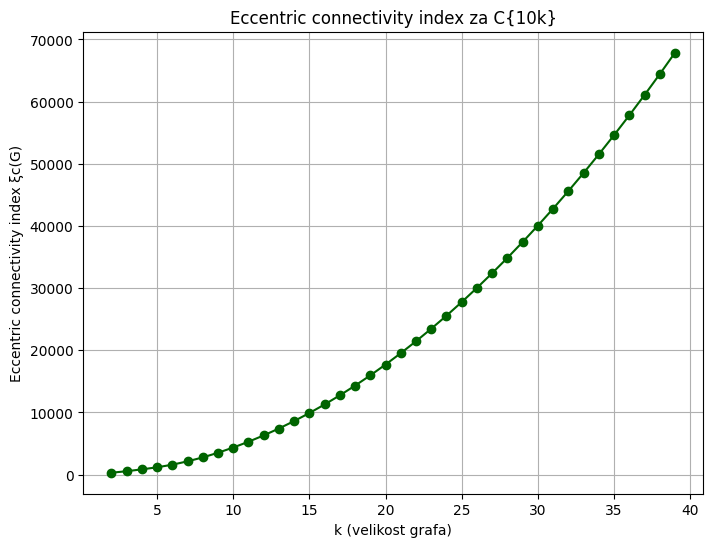

In [94]:
# Funkcija za eccentric connectivity index
def eccentric_connectivity_index(G):
    eccentricities = nx.eccentricity(G)  # ekscentričnosti vozlišč
    degrees = dict(G.degree())  # stopnje vozlišč

    index = sum(degrees[v] * eccentricities[v] for v in G.nodes())
    return index


k_values = range(2, 40)
ecc_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    eci = eccentric_connectivity_index(G)
    ecc_indices.append(eci)


plt.figure(figsize=(8, 6))
plt.plot(k_values, ecc_indices, 'o-', color='darkgreen')
plt.xlabel('k (velikost grafa)')
plt.ylabel('Eccentric connectivity index ξc(G)')
plt.title('Eccentric connectivity index za C{10k}')
plt.grid(True)
plt.show()

Ta indeks je odvisen od stopnje vozlišč in od ekscentričnosti vozlišč. Naš graf je 3-regularen, zato je v našem primeru indeks odvisen zgolj od ekscentričnosti. Tako rast indeksa odraža rast ekscentričnosti. Graf nam jasno kaže, da se z večanjem vozlišč graf razteguje v dolžino.

2. Eccentric adjacency index

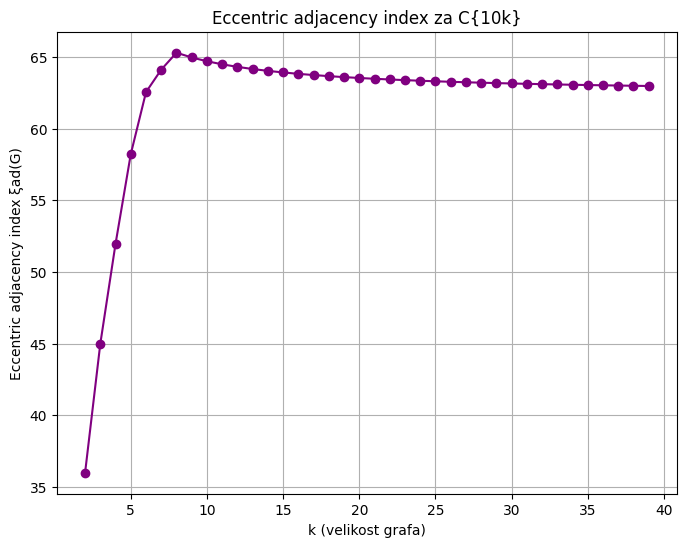

In [95]:
# Funkcija za eccentric adjacency index
def eccentric_adjacency_index_div(G):
    eccentricities = nx.eccentricity(G)
    degrees = dict(G.degree())

    index = 0
    for v in G.nodes():
        sum_deg_neighbors = sum(degrees[neighbor] for neighbor in G.neighbors(v))
        index += sum_deg_neighbors / eccentricities[v]

    return index


k_values = range(2, 40)
ecc_adj_div_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    eai_div = eccentric_adjacency_index_div(G)
    ecc_adj_div_indices.append(eai_div)


plt.figure(figsize=(8, 6))
plt.plot(k_values, ecc_adj_div_indices, 'o-', color='purple')
plt.xlabel('k (velikost grafa)')
plt.ylabel('Eccentric adjacency index ξad(G)')
plt.title('Eccentric adjacency index za C{10k}')
plt.grid(True)
plt.show()

Ta indeks je odvisen od ekstentričnosti posameznega vozlišča in vsote stopenj njegovih sosedov. \
- Ko je k majhen, indeks hitro narašča. Ko dodamo samo nekaj orbital, se poveča vsota stopenj sosedov, ampak hkrati ekscentričnost še ni močno narasla, kar poveča indeks.
- Graf hitro doseže maksimum in nato se približuje določeni vrednosti. Ko k narašča, začnejo tudi ekscentričnosti vozlišč hitro naraščati, kar zmanjšuje indeks. zaradi regularnosti našega grafa pa se ta dva učinka medsebojno izravnata.

In [96]:
# Funkcija za eccentric adjacency indeks 
def eccentric_adjacency_index_div(G):
    eccentricities = nx.eccentricity(G)
    degrees = dict(G.degree())

    return sum(sum(degrees[neighbor] for neighbor in G.neighbors(v)) / eccentricities[v] for v in G.nodes())


# Preverjanje limite za velike vrednosti k
large_k_values = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 500]
indices = []

for k in large_k_values:
    molecule = ntf(k)
    G = molecule.G
    idx_value = eccentric_adjacency_index_div(G)
    indices.append(idx_value)
    print(f"k={k}, eccentric adjacency indeks: {idx_value:.4f}")



k=50, eccentric adjacency indeks: 62.8355
k=60, eccentric adjacency indeks: 62.7598
k=70, eccentric adjacency indeks: 62.7058
k=80, eccentric adjacency indeks: 62.6654
k=90, eccentric adjacency indeks: 62.6339
k=100, eccentric adjacency indeks: 62.6088
k=110, eccentric adjacency indeks: 62.5883
k=120, eccentric adjacency indeks: 62.5711
k=130, eccentric adjacency indeks: 62.5567
k=140, eccentric adjacency indeks: 62.5442
k=150, eccentric adjacency indeks: 62.5335
k=500, eccentric adjacency indeks: 62.4283


Opazimo, da (po doseženem maksimumu) konvergira proti 62.

3. First eccentric connectivity index

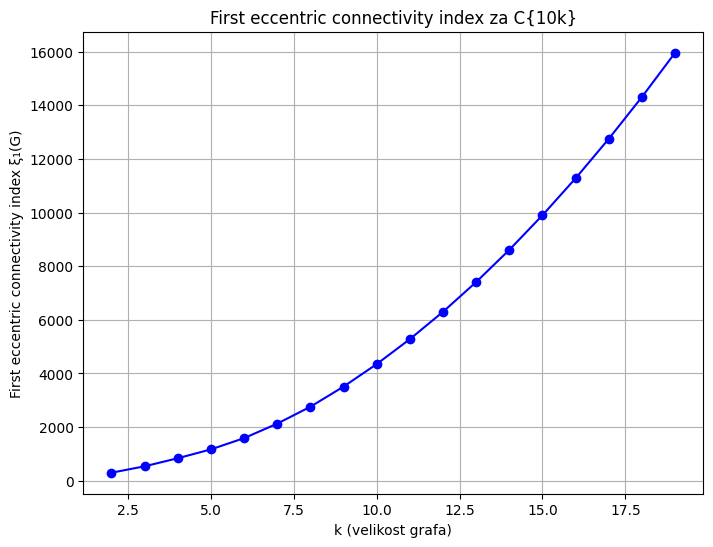

In [97]:
# Funkcija za first eccentric connectivity index
def first_eccentric_connectivity_index(G):
    eccentricities = nx.eccentricity(G)

    index = sum(eccentricities[u] + eccentricities[v] for u, v in G.edges())
    return index


k_values = range(2, 20)
first_ecc_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    fec_index = first_eccentric_connectivity_index(G)
    first_ecc_indices.append(fec_index)


plt.figure(figsize=(8, 6))
plt.plot(k_values, first_ecc_indices, 'o-', color='blue')
plt.xlabel('k (velikost grafa)')
plt.ylabel('First eccentric connectivity index ξ₁(G)')
plt.title('First eccentric connectivity index za C{10k}')
plt.grid(True)
plt.show()

Indeks je odvisen od ekscentričnosti in števila povezav in narašča približno kvadratno. 

4. Second eccentric connectivity index

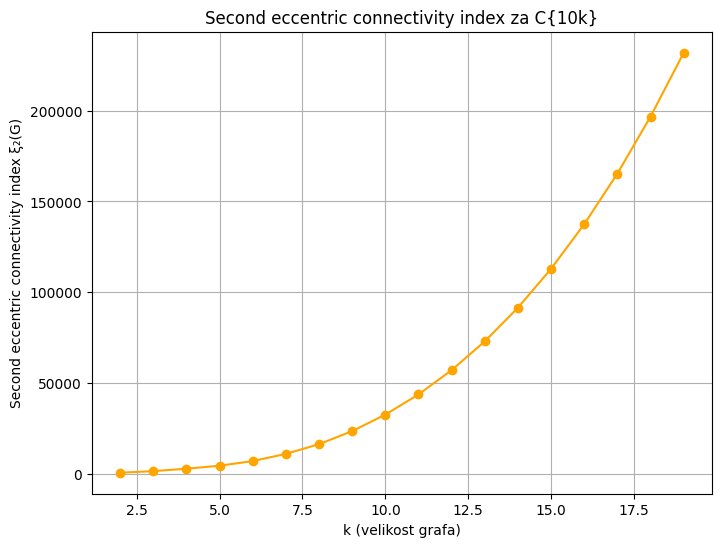

In [98]:
# Funkcija za second eccentric connectivity index
def second_eccentric_connectivity_index(G):
    eccentricities = nx.eccentricity(G)

    index = sum(eccentricities[u] * eccentricities[v] for u, v in G.edges())
    return index

k_values = range(2, 20)
second_ecc_indices = []

for k in k_values:
    molecule = ntf(k)
    G = molecule.G
    sec_index = second_eccentric_connectivity_index(G)
    second_ecc_indices.append(sec_index)


plt.figure(figsize=(8, 6))
plt.plot(k_values, second_ecc_indices, 'o-', color='orange')
plt.xlabel('k (velikost grafa)')
plt.ylabel('Second eccentric connectivity index ξ₂(G)')
plt.title('Second eccentric connectivity index za C{10k}')
plt.grid(True)
plt.show()

Indeks je odvisen od ekscentričnosti in števila povezav, enako kot pri prejšnjem primeru. Indeks uporablja produkt eksentričnosti, zato je pričakovana hitrejša rast kot prej, kar tudi graf potrjuje.